In [4]:
%%html
<style>
div.optional {
    display: block;
    background-color: #d7e2ff;
    border-color: #d7e2ff;
    border-left: 5px solid #d7e2ff;
    padding: 0.5em;
}
div.advanced {
    display: block;
    background-color: #fff4d7;
    border-color: #fff4d7;
    border-left: 5px solid #fff4d7;
    padding: 0.5em;
}
</style>

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation
# as this lecture is about interpolation we will make use of this SciPy library
import scipy.interpolate as si
import scipy.integrate

# some default font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

# Computational Mathematics <a class="tocSkip">

## Interpolation, regression (or curve-fitting) and quadrature <a class="tocSkip">

# Lecture plan / learning objectives: <a class="tocSkip">


* Learn about some of the standard methods to (1) approximate discrete data points, and/or to (2) approximate functions.


* Understand the differences between interpolation and regression/curve-fitting.


* Derive and implement methods to compute simple polynomial interpolation and regression in 1D.


* Introduce quadrature and its link to interpolation.


* Further practice of your coding and plotting skills.


* Introduction to some ideas related to error analysis and convergence.


Note that many of the ideas, results and algorithms introduced in this lecture will be reused in several subsequent lectures and modules.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Interpolation" data-toc-modified-id="Interpolation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Interpolation</a></span><ul class="toc-item"><li><span><a href="#Interpolation-vs-curve-fitting" data-toc-modified-id="Interpolation-vs-curve-fitting-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Interpolation vs curve-fitting</a></span><ul class="toc-item"><li><span><a href="#Interpolation" data-toc-modified-id="Interpolation-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Interpolation</a></span></li><li><span><a href="#Choice-of-interpolating-(or-curve-fitting)-functions" data-toc-modified-id="Choice-of-interpolating-(or-curve-fitting)-functions-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Choice of interpolating (or curve-fitting) functions</a></span></li><li><span><a href="#Curve-fitting" data-toc-modified-id="Curve-fitting-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Curve-fitting</a></span></li></ul></li><li><span><a href="#Polynomial-interpolation" data-toc-modified-id="Polynomial-interpolation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Polynomial interpolation</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#A-simple-(monomial)-basis" data-toc-modified-id="A-simple-(monomial)-basis-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>A simple (monomial) basis</a></span></li><li><span><a href="#Uniqueness-of-the-interpolating-polynomial" data-toc-modified-id="Uniqueness-of-the-interpolating-polynomial-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Uniqueness of the interpolating polynomial</a></span></li><li><span><a href="#Some-simple-low-order-examples" data-toc-modified-id="Some-simple-low-order-examples-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Some simple low-order examples</a></span></li><li><span><a href="#Vandermonde-matrix-and-the-monomial-basis" data-toc-modified-id="Vandermonde-matrix-and-the-monomial-basis-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Vandermonde matrix and the monomial basis</a></span></li><li><span><a href="#Lagrange-polynomial" data-toc-modified-id="Lagrange-polynomial-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>Lagrange polynomial</a></span></li><li><span><a href="#Lagrange-basis-polynomials" data-toc-modified-id="Lagrange-basis-polynomials-1.2.7"><span class="toc-item-num">1.2.7&nbsp;&nbsp;</span>Lagrange basis polynomials</a></span></li><li><span><a href="#Example:-the-linear-case" data-toc-modified-id="Example:-the-linear-case-1.2.8"><span class="toc-item-num">1.2.8&nbsp;&nbsp;</span>Example: the linear case</a></span></li></ul></li><li><span><a href="#Using-scipy.interpolate" data-toc-modified-id="Using-scipy.interpolate-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Using scipy.interpolate</a></span></li><li><span><a href="#Approximating-a-function" data-toc-modified-id="Approximating-a-function-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Approximating a function</a></span><ul class="toc-item"><li><span><a href="#A-simple-example" data-toc-modified-id="A-simple-example-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>A simple example</a></span></li><li><span><a href="#Error-in-Lagrange-interpolation" data-toc-modified-id="Error-in-Lagrange-interpolation-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Error in Lagrange interpolation</a></span></li><li><span><a href="#Aside:-The-Lagrange-Remainder-Theorem--[$\star\star$]" data-toc-modified-id="Aside:-The-Lagrange-Remainder-Theorem--[$\star\star$]-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Aside: The Lagrange Remainder Theorem  [$\star\star$]</a></span></li><li><span><a href="#Simple-example" data-toc-modified-id="Simple-example-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Simple example</a></span></li><li><span><a href="#A-more-problematic-example-[$\star$]" data-toc-modified-id="A-more-problematic-example-[$\star$]-1.4.5"><span class="toc-item-num">1.4.5&nbsp;&nbsp;</span>A more problematic example [$\star$]</a></span></li></ul></li><li><span><a href="#Piecewise-polynomial-interpolation---[$\star$]" data-toc-modified-id="Piecewise-polynomial-interpolation---[$\star$]-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Piecewise polynomial interpolation   [$\star$]</a></span><ul class="toc-item"><li><span><a href="#Piecewise-linear-interpolant" data-toc-modified-id="Piecewise-linear-interpolant-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Piecewise-linear interpolant</a></span></li><li><span><a href="#Piecewise-quadratic-interpolant" data-toc-modified-id="Piecewise-quadratic-interpolant-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Piecewise-quadratic interpolant</a></span></li><li><span><a href="#Observations" data-toc-modified-id="Observations-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Observations</a></span></li></ul></li><li><span><a href="#Compare-interpolation-methods" data-toc-modified-id="Compare-interpolation-methods-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Compare interpolation methods</a></span></li><li><span><a href="#Other-methods-[$\star\star$]" data-toc-modified-id="Other-methods-[$\star\star$]-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Other methods [$\star\star$]</a></span><ul class="toc-item"><li><span><a href="#Cubic-splines" data-toc-modified-id="Cubic-splines-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>Cubic splines</a></span></li><li><span><a href="#Piecewise-Cubic-Hermite-Interpolating-Polynomial-(PCHIP)" data-toc-modified-id="Piecewise-Cubic-Hermite-Interpolating-Polynomial-(PCHIP)-1.7.2"><span class="toc-item-num">1.7.2&nbsp;&nbsp;</span>Piecewise Cubic Hermite Interpolating Polynomial (PCHIP)</a></span></li></ul></li></ul></li><li><span><a href="#Curve-fitting-or-regression" data-toc-modified-id="Curve-fitting-or-regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Curve-fitting or regression</a></span><ul class="toc-item"><li><span><a href="#Least-squares-error-calculation" data-toc-modified-id="Least-squares-error-calculation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Least squares error calculation</a></span><ul class="toc-item"><li><span><a href="#Observations" data-toc-modified-id="Observations-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Observations</a></span></li></ul></li><li><span><a href="#Example:-Submarine-landslide-size-in-the-North-Atlantic" data-toc-modified-id="Example:-Submarine-landslide-size-in-the-North-Atlantic-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Example: Submarine landslide size in the North Atlantic</a></span></li></ul></li><li><span><a href="#Extrapolation" data-toc-modified-id="Extrapolation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Extrapolation</a></span><ul class="toc-item"><li><span><a href="#Extrapolation-example" data-toc-modified-id="Extrapolation-example-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Extrapolation example</a></span></li></ul></li><li><span><a href="#Quadrature-(very-brief-introduction)" data-toc-modified-id="Quadrature-(very-brief-introduction)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Quadrature (very brief introduction)</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Numerical-integration-or-&quot;Quadrature&quot;" data-toc-modified-id="Numerical-integration-or-&quot;Quadrature&quot;-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Numerical integration or "Quadrature"</a></span></li><li><span><a href="#Some-calculus" data-toc-modified-id="Some-calculus-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Some calculus</a></span></li><li><span><a href="#Integration-of-data-or-of-functions" data-toc-modified-id="Integration-of-data-or-of-functions-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Integration of data or of functions</a></span></li><li><span><a href="#A-simple-integration-example" data-toc-modified-id="A-simple-integration-example-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>A simple integration example</a></span></li></ul></li><li><span><a href="#The-Midpoint-rule" data-toc-modified-id="The-Midpoint-rule-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>The Midpoint rule</a></span><ul class="toc-item"><li><span><a href="#Implementing-a-midpoint-rule-function" data-toc-modified-id="Implementing-a-midpoint-rule-function-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Implementing a midpoint rule function</a></span></li><li><span><a href="#Errors-and-convergence" data-toc-modified-id="Errors-and-convergence-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Errors and convergence</a></span></li><li><span><a href="#Observations" data-toc-modified-id="Observations-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Observations</a></span></li></ul></li><li><span><a href="#Trapezoidal-rule" data-toc-modified-id="Trapezoidal-rule-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Trapezoidal rule</a></span><ul class="toc-item"><li><span><a href="#Observations" data-toc-modified-id="Observations-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Observations</a></span></li><li><span><a href="#The-composite-version-of-the-trapezoidal-rule" data-toc-modified-id="The-composite-version-of-the-trapezoidal-rule-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>The composite version of the trapezoidal rule</a></span></li><li><span><a href="#Terminology---composite-quadrature-rules" data-toc-modified-id="Terminology---composite-quadrature-rules-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Terminology - composite quadrature rules</a></span></li></ul></li><li><span><a href="#Quadrature-Accuracy-and-Errors-[$\star$]" data-toc-modified-id="Quadrature-Accuracy-and-Errors-[$\star$]-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Quadrature Accuracy and Errors [$\star$]</a></span></li><li><span><a href="#Error-analysis-(qualitative)--[$\star$]" data-toc-modified-id="Error-analysis-(qualitative)--[$\star$]-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Error analysis (qualitative)  [$\star$]</a></span></li><li><span><a href="#Simpson's-rule-derivation--[$\star$]" data-toc-modified-id="Simpson's-rule-derivation--[$\star$]-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Simpson's rule derivation  [$\star$]</a></span></li><li><span><a href="#Simpson's-rule-Implementation" data-toc-modified-id="Simpson's-rule-Implementation-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Simpson's rule Implementation</a></span><ul class="toc-item"><li><span><a href="#Observations" data-toc-modified-id="Observations-4.7.1"><span class="toc-item-num">4.7.1&nbsp;&nbsp;</span>Observations</a></span></li></ul></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

# Preliminary lecture comments <a class="tocSkip">


- We will try to be careful to use the term [*degree*](https://en.wikipedia.org/wiki/Degree_of_a_polynomial) consistently as the highest degree power that appears in a polynomial, but [*order*](http://mathworld.wolfram.com/PolynomialOrder.html) will also be acceptable and may slip in at points and you may come across this elsewhere.

For example

$$f(x) := 1+x - 2x^4,$$

is a degree four polynomial.

    
<br>

    
-  To avoid confusion over **my** use of the mathematical symbols $\;\;=\;\;$ vs $\;\;:=\;\;$ vs $\;\;\equiv\;\;$, you should read the first as "equals", the second as "is defined to be", and the third "is equivalent, or is identically equal to".  

So, for example we might say

$$ f(x) := \sin^2(x) \implies f(x) + \cos^2 (x) \equiv 1,$$

i.e. if we *define/assign* $\;f\;$ to be $\;\sin\;$ then it is *always true* (i.e. for all arguments $x$) that $\;f(x)^2 + \cos^2(x)\;$ is equal to 1.

    
<br>
    
    
And

$$\text{if} \;\;\;\; f(x) := \sin^2(x) \;\;\;\;\text{then}\;\;\;\; f(x) =0 \implies x = \pm k\,\pi,\;\;\; k = 0,1,2,\ldots$$

i.e. if we *define* $f$ to be $\sin^2$ then $f$ being *equal* to zero implies that $x$ must take the values ...
Nothing in this statement requires the use of the "is identically equal to" notation.

<br>


Aside: some further reading on the use of symbols such as ":=" in pseudocode: <https://softwareengineering.stackexchange.com/questions/101716/in-pseudo-code-what-does-mean>


<br>

    
- If **you** don't use this convention, and just use "$=$" for all of these cases, it's not the end of the world and you won't lose marks!  I may well slip and not bother being so precise myself in places.

# Interpolation


## Interpolation vs curve-fitting

Consider a discrete set of data points 

$$ (x_i, y_i),\;\;\;\;\;\; i=0,\ldots,N,$$

and suppose that we wish to approximate this data in some sense. 

The data may be known to be exact (e.g. we may wish to approximate a complex function, which we can evaluate exactly, by a simpler expression say), or it may have acknowledged errors from measurement/observational techniques, with known or unknown [error bars](https://en.wikipedia.org/wiki/Error_bar).

<br>

[NB. you will return to related ideas in later modules, e.g. Machine Learning].

### Interpolation

[*Interpolation*](https://en.wikipedia.org/wiki/Interpolation) generally assumes that these data points are *exact* (e.g. no measurement errors) and at *distinct* $x$ locations, i.e. there is no ambiguity in a mapping from $x$ to $y$ (which there would be if we had multiple $y$ values for the same $x$; we will see this scenario in the case of curve-fitting covered below. The same $x$ and $y$ pairs exactly repeated obviously means repeated data and depending on application all the exact replicas might be removed). 

<br>

[Note that sometimes we may have control over the $x$ locations, but sometimes we won't - we'll just be given arbitrary data - we'll cover both cases below].

<br>

The process of interpolation then seeks to fit a function (or curve), 

$$ y = f(x), $$ 

to this data that **exactly passes through the $N+1$ discrete points**, 

i.e. given the data our job in interpolation is to find a suitable function $f$.

<br>

We can then use this function to find (or estimate) $y$ values at $x$ locations other than those provided by the data. 

When these new $x$ locations are within the range of known data points (i.e. for $x\in[\min\{x_i\},\max\{x_i\}]$) this process is called **interpolation**. 

In the case where we seek new $y$ values at $x$ locations that are outside the data range this is called [**extrapolation**](https://en.wikipedia.org/wiki/Extrapolation) (which we will return to towards the end of this lecture). We may not get this far during the lecture, in which case the take-home message is: be extremely cautious when extrapolating and ideally if at all possible don't do it!!

The requirement for distinct $x$ locations means that we have a constraint on the $x_i$'s which can be written as

$$x_0 < x_1 < \ldots < x_N,$$ 

(i.e. we will assume our data points have been sorted in $x$),

and for $f$ to be an [*interpolant*](http://mathworld.wolfram.com/Interpolant.html) we require that 

$$y_i = f(x_i),\;\;\;\;\;\; \forall i, \;\;\;\;\;\text{[$\forall \equiv$ "for all"]}$$

i.e. the curve mapped out by $\;y=f(x)\;$ for all $x$ values passes through ALL our $(x_i,y_i)$ data points exactly.

In this case the function $f$ is known as the *interpolating function*, or simply the *interpolant*.

At this stage the function $f$ can be thought of as being quite arbitrary - it doesn't necessarily need to be *smooth*, and could have sharp corners (i.e. have jumps in derivatives) such as in the following example 


<img src="https://upload.wikimedia.org/wikipedia/commons/c/c5/C0_function.svg" width=300x>

*(Figure: https://en.wikipedia.org/wiki/Smoothness;  https://upload.wikimedia.org/wikipedia/commons/c/c5/C0_function.svg)*


<br>

(although we could stipulate some level of smoothness as we will in some examples towards the end of this lecture).



We could also allow it to be only **piecewise continuous** (the use of the word [*piecewise*](https://en.wikipedia.org/wiki/Piecewise) meaning it is continuous in regions, but can be discontinuous in between these regions): 


<img src="https://upload.wikimedia.org/wikipedia/commons/c/c0/Upper_semi.svg" width=300x>

*(Figure: https://en.wikipedia.org/wiki/Piecewise;  https://upload.wikimedia.org/wikipedia/commons/c/c0/Upper_semi.svg)*


<br>

The first image above is *piecewise linear* (i.e. built from different straight line segments) and *continuous*. It clearly has a jump in the value of its derivative at $x=0$ (and hence its first derivative is *discontinuous*).


<br>

The second image above is  piecewise-quadratic, and in this example is discontinuous between the "pieces" but visually at least looks to have a continuous value of derivative across the jump location.

... we have lots of flexibility over the nature of the <a href="https://en.wikipedia.org/wiki/Function_(mathematics)">*functions*</a> we can use to try and fit data.

### Choice of interpolating (or curve-fitting) functions

We have a lot of choice for how we construct the interpolating or curve-fitting function.

Considerations for how to do this include the required/desired *smoothness* of the resulting function (i.e. how many smooth derivatives it has - cf. the piecewise polynomial case), replicating known positivity/boundedness or periodicity, the cost of evaluating it, etc.

Some choices include: polynomials, piecewise polynomials, trigonometric series (i.e. sums of sines and cosines leading to an approximation similar to [*Fourier series*](https://en.wikipedia.org/wiki/Fourier_series)).

We will see examples of *Lagrange polynomials* below, and will also mention a few other options such as *Chebyshev* and *Hermite polynomials*, and *splines*, all of which possess different properties that may be more or less appropriate depending on application.

#### Some arbitrary test data

Let's first invent a small set of arbitrary data which we shall seek to interpolate throughout this lecture using different methods, and define a function that will save us from typing the same plotting commands multiple times.

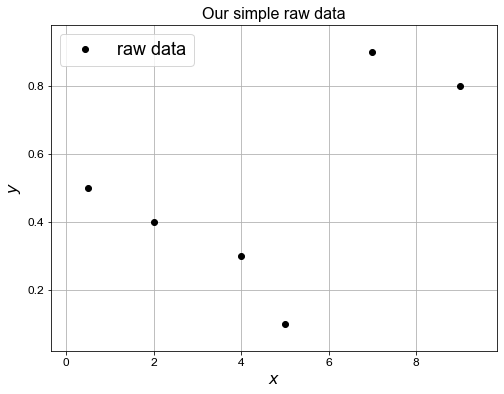

In [6]:
# Invent some raw data - we will use the notation (xi,yi) for the
# given data, where xi and yi are of length N+1 (N=len(xi)-1)
xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])

# We will want to overlay a plot of the raw data a few times below so 
# let's do this via a function that we can call repeatedly
# [Note that I've been a bit lazy in later lectures and really should
# do this sort of thing more often to make code easier to read - apologies]
def plot_raw_data(xi, yi, ax):
    """plot x vs y on axes ax, 
    add axes labels and turn on grid
    """
    ax.plot(xi, yi, 'ko', label='raw data')
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.grid(True)


# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)

# For clarity we are going to add a small margin to all the plots.
ax1.margins(0.1)

# plot the raw data
plot_raw_data(xi, yi, ax1)

# add a figure title
ax1.set_title('Our simple raw data', fontsize=16)

# Add a legend
ax1.legend(loc='upper left', fontsize=18);
# loc='best' means we let matplotlib decide the best place for the
# legend to go.  For other options see 
#  https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html

#### Simple interpolation example

One of the simplest examples of interpolation is to simply fit a straight line between every two successive data points.

This is termed **piecewise-linear** interpolation, and the resulting function is called a **piecewise-linear interpolant**.

This is an example of the more general **piecewise-polynomial** interpolation - a piecewise quadratic discontinuous function was given in the example image above.

[Note that we will return to piecewise polynomial interpolation a bit later.]

Of course the default approach to plotting effectively performs piecewise-linear interpolation as we shall now see.

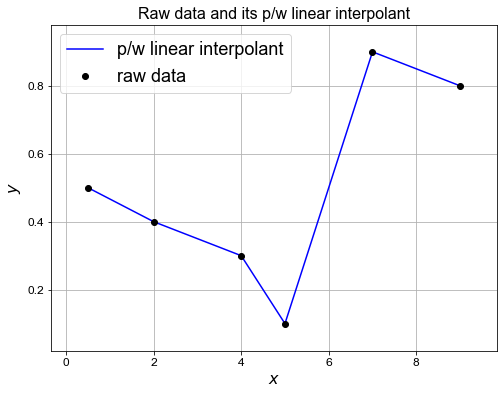

In [7]:
# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# Plot a piecewise-linear approximation.
# We get this simply by connecting the points with straight lines
# and this is the default behaviour of the plotting routine so simply
# involves a call to 'plot' with our data.
ax1.plot(xi, yi, 'b', label='p/w linear interpolant')

# Overlay raw data
plot_raw_data(xi, yi, ax1)

# Add a legend
ax1.legend(loc='best', fontsize=18)

# add a figure title
ax1.set_title('Raw data and its p/w linear interpolant', fontsize=16);

### Curve-fitting

Alternatively, when we have data with noise/errors, or multiple different measurement values ($y$) for a single $x$, then we may not want to, or cannot fit a function/curve that goes through all points exactly, and rather have to perform [**curve-fitting**](https://en.wikipedia.org/wiki/Curve_fitting) - finding a function that approximates the data in some sense but does not necessarily go through all the points. 

In this case we *no longer* have the requirement that 

$$x_0 < x_1 < \ldots < x_N,$$ 

and can consider the data simply as a *cloud of points*, not worrying what order they are in.

This is the most typical case for real world data which contains variability and noise and could additionally give rise to multiple different measurements (i.e. $y$ values) at the same $x$ location.

<br>

If we were to construct a single straight line:

$$y = m x+c, \;\;\;\;\; \text{where we have only two free parameters:} \;\;\; \text{the gradient} \;\;\;\; m 
\;\;\;\;\text{and the intercept} \;\;\;\; c$$ 

that, for example, minimised the sum of the squares of the differences to the data, this would be what is known as a [*least squares approximation*](https://en.wikipedia.org/wiki/Least_squares) to the data using a linear function.  We will return to this in a section on curve-fitting below.

With real data this fitting of data to a function often has the effect of *smoothing* complex or noisy data.

For example, fitting a straight line to a cloud of points:

<img src="./figures/cloud.svg" width=500x>

<br>

Note that curve-fitting is related to the topic of [*regression analysis*](https://en.wikipedia.org/wiki/Regression_analysis). Fitting a polynomial to data in a least squares sense is an example of what can be termed *polynomial regression*; the example immediately above is therefore an example of *linear* regression.  Note that some people will use the terms interpolation, curve-fitting and regression in (wrong and) inter-changeable ways - be careful over using the correct terminology.

#### Simple curve-fitting example

While we could just use the default plotting method to demonstrate linear interpolation, to demonstrate linear curve-fitting we need to do a bit more work.

The example below demonstrates how we can use `numpy.polyfit` to do this for us - take a look at the docs here <https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.polyfit.html>.

``` Python
numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
```
>   Least squares polynomial fit.

>   Fit a polynomial p(x) = p[0] * x**deg + ... + p[deg] of degree deg to points (x, y). Returns a vector of coefficients p    that minimises the squared error.

So it returns the coefficients of the polynomial fit to the data. We can then use `numpy.poly1d` to turn this into a function we can easily evaluate, as seen in the next example.

If we were doing this evaluation ourselves we would need to read the docs carefully to see that the first entry of the returned coefficient is the multiplier of the highest power of $x$ - i.e. in the linear case the gradient, with the second number being the intercept. Printing the coefficients out below we see this to be correct.

poly_coeffs:  [-0.00301599  0.06536037 -0.49614427  1.59623195 -2.08266478  1.20030166]


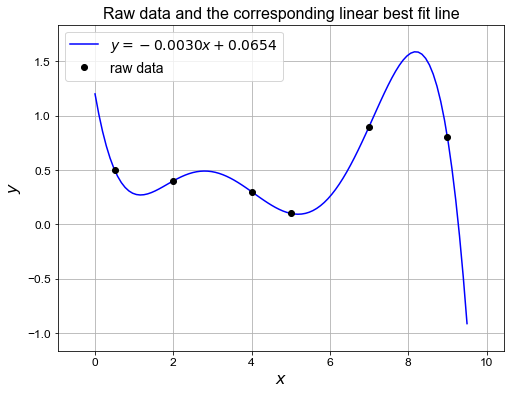

In [16]:
# Fit a polynomial of degree 1, i.e. a straight line, to our (xi, yi) data from above
# we'll explain what's going on here later in this lecture
degree = 5
poly_coeffs = np.polyfit(xi, yi, degree)
print('poly_coeffs: ',poly_coeffs)

# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(poly_coeffs)

# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# Plot the linear fit - define 100 evenly spaced points (x) covering our
# x extent and plot our linear polynomial evaluated at these points (p1(x))
# of course 100 is overkill for this linear example
x = np.linspace(0., 9.5, 100)
# NB. the 'linspace' function from numpy returns evenly spaced numbers 

# over a specified interval. It takes three arguments; the first two 
# are the bounds on the range of values, and the third is the total 
# number of values we want.
# See the docs (i.e. np.linspace?) for additional options arguments

ax1.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(poly_coeffs[0], poly_coeffs[1]))

# Overlay raw data
plot_raw_data(xi, yi, ax1)

# Add a legend
ax1.legend(loc='best', fontsize=14)

# add a figure title
ax1.set_title('Raw data and the corresponding linear best fit line', fontsize=16);

## Polynomial interpolation

### Introduction

1. Suppose we are given a set of $N+1$ data points $(x_i, y_i)$ (with distinct $x_i$'s). 

<br>

2. Now suppose we construct a polynomial of degree $N$:

$$ P_N(x) := a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \ldots a_N x^N, $$

where $a_0, \, a_1, \, \ldots, \, a_N$ are the coefficients of our polynomial. 


<br>

- Note that there are $N+1$ of these coefficients available to us with a degree $N$ polynomial. This number of free parameters ($N+1$) agreeing exactly with the number of data points ($N+1$) is important - can you see why? We shall see shortly.


<br>


- We recognise this $\;P_N\;$ as the simple expression for a *polynomial* we have probably been introduced to before. 

### A simple (monomial) basis

But note that we can also interpret this as a *linear combination* of a <a href="https://en.wikipedia.org/wiki/Basis_(linear_algebra)">*basis*</a> made up of single-term polynomials: 

$$1, \; x, \; x^2, \; \ldots, \; x^N.$$ 

These single term polynomials are also referred to as [*monomials*](https://en.wikipedia.org/wiki/Monomial). 

We will come back to monomials, as well as other (NB. a basis is not unique) potential functions/polynomials to use as basis functions later -  we will see below that other basis options can be more convenient when actually implementing interpolation.

### Uniqueness of the interpolating polynomial

Given $N+1$ pieces of *distinct* data, why did we write down a *degree $N$* polynomial above? 

$\longrightarrow$ with a degree $N$ polynomial we have $N+1$ free coefficients, and we have $N+1$ pieces of (*distinct*) information - that the polynomial passes through our data point exactly. This is a well-defined problem with a *unique* solution and it follows that the polynomial of degree $N$ passing through our data is unique. 

[Actually it's a polynomial of *at most* degree $N$ - when we solve for the unique coefficients some of these might be zero of course, and if the coefficient corresponding to the highest power is zero then we can exactly approximate the data with a polynomial of degree less that $N$. Imagine three points lying on a straight line for example].

In the case of fitting an $N+1$ degree polynomial (with $N+2$ coefficients, which are the unknowns) to $N+1$ (or less) pieces of data - this is an [*under-determined*](https://en.wikipedia.org/wiki/Underdetermined_system) problem and we have (infinitely) many solutions (since we have $N+2$ unknowns but $N+1$ or less data points).

In the case of fitting an $N-1$ degree polynomial to $N+1$ (or more) pieces of data - this is an [*over-determined*](https://en.wikipedia.org/wiki/Overdetermined_system) problem (since we have $N$ unknowns but $N+1$ or more data points) and we do not *necessarily* have any solution (we *might*, as in the example of three pieces of data lying exactly on a straight line).

<br>

>**The interpolating polynomial of the least degree is therefore unique.**

<br>

Why have we emphasised use of the term *distinct* several times? $\longrightarrow$ we'll return to this point below.

### Some simple low-order examples

Now how do we go about computing the polynomial, or how do we conduct polynomial interpolation?

This is equivalent to asking: given $N+1$ pieces of data, how do we find the $N+1$ coefficients?


<br>

#### Fitting a single data point

The polynomial that fits the single data point $(x_0,y_0)$ is clearly simply the *constant* function given by

$$ y = f(x) \equiv y_0, \;\;\;\;\; \text{i.e. the degree zero polynomial:} \;\;\;\;\; y = P_0(x) \equiv a_0 
\;\;\; \text{where} \;\;\; a_0 = y_0$$

<br>

#### Fitting two data points

The polynomial that fits the two data points $\{(x_0,y_0),(x_1,y_1)\}$ is clearly the *linear* function given by

$$ y = f(x) \equiv a_0 + a_1\,x, \;\;\;\;\; \text{i.e. the degree one polynomial:} \;\;\;\;\; y = P_1(x) \equiv a_0 + a_1\,x$$

where through substitution of our data into the functional form we arrive at two simultaneous equations (or a $2\times 2$ matrix system) which can fairly easily be solved by substituting one equation into the other (see earlier lecture) to conclude that

$$ a_0 = y_0 - \frac{y_1-y_0}{x_1-x_0}x_0, \;\;\;\;\;\;\;\; a_1 = \frac{y_1-y_0}{x_1-x_0}. $$

[See the homework exercise where you are asked to do this. Also note that I refer back to this result a bit later where the Lagrange polynomial is derived in the two data point case.].

Let's implement and plot some examples to check that this is correct visually.

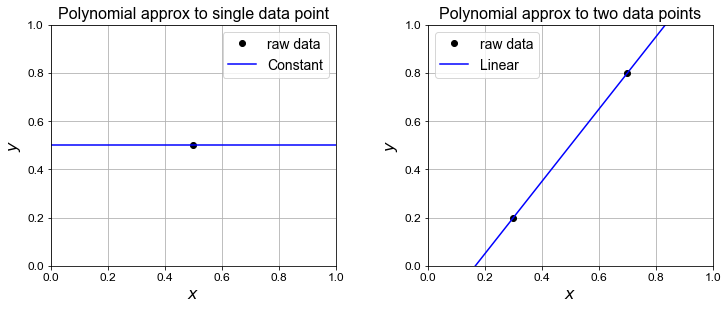

In [17]:
# set up our figs for plotting - we want two subplots arranged in a 1x2 grid
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.tight_layout(w_pad=5)  # add some padding otherwise the axes labels overlap

#### single data point example
xi = [0.5]
yi = [0.5]

# plot the raw data on our first axis (ax1)
plot_raw_data(xi, yi, ax1)

# set up a grid of equally spaced x points to plot our functions over
x = np.linspace(0., 1., 100)

# np.ones_like(x) gives us a numpy array of 1's of the same size as x
# we need arrays of the same length for plotting
y = yi*np.ones_like(x)

# plot the p/w constant line and give it a label for use in a legend
# use the first of our two axis labels (ax1)
ax1.plot(x, y, 'b', label='Constant')

# add a figure title
ax1.set_title('Polynomial approx to single data point', fontsize=16)
# Add a legend
ax1.legend(loc='best', fontsize=14)
# set bounds on the view
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)

#### two data point example
xi = [0.3, 0.7]
yi = [0.2, 0.8]

# plot the raw data
plot_raw_data(xi, yi, ax2)

# redefine x - just in case we wanted to edit for second plot
x = np.linspace(0., 1., 100)

# these are the mathematical expressions derived above
# for the polynomial (linear) coefficients
a0 = yi[0] - ((yi[1] - yi[0]) / (xi[1] - xi[0])) * xi[0]
a1 = ((yi[1] - yi[0]) / (xi[1] - xi[0]))

# form the linear at the x locations using array operations
y = a0 + a1*x

# plot on the second of our two axis labels (ax2)
ax2.plot(x, y, 'b', label='Linear')

# add a figure title
ax2.set_title('Polynomial approx to two data points', fontsize=16)
# Add a legend
ax2.legend(loc='best', fontsize=14)
# set bounds
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1);

#### Fitting three data points

The polynomial that fits the three data points $\{(x_0,y_0),(x_1,y_1),(x_2,y_2)\}$ is of course a quadratic,
but things start to get a bit more complicated now if we actually want to solve for the polynomial coefficients.

Substituting the data into the quadratic leads to a system of three simultaneous equations, or a $3\times 3$ linear system to solve. 

This is a lot more tricky to solve by hand than the $2\times 2$ system for the linear coefficients that we could solve through substitution quite easily (see homework for the details).

However, you should be able to show that this system takes the form

$$
\begin{pmatrix}
1 & x_0 & x_0^2 \\
1 & x_1 & x_1^2 \\
1 & x_2 & x_2^2
\end{pmatrix}
\begin{pmatrix}
a_0\\
a_1\\
a_2
\end{pmatrix}
=
\begin{pmatrix}
y_0\\
y_1\\
y_2
\end{pmatrix} \;\;\;\;\;\;\;\text{or equivalently in matrix notation} \;\;\;\;\;\; V\boldsymbol{a} =\boldsymbol{y}.
$$

If we solve this system by inverting the matrix ($V$) we have our quadratic polynomial coefficients:  $\boldsymbol{a} = V^{-1}\boldsymbol{y}$.

Based on what we learnt in an earlier lecture let's form and solve the matrix system using appropriate NumPy functions.

V = 
[[1.   0.3  0.09]
 [1.   0.5  0.25]
 [1.   0.8  0.64]]

 Our coefficients a = 
[-1.8         8.86666667 -7.33333333]

The output from np.polyfit(x, y, 2) = 
 [-7.33333333  8.86666667 -1.8       ]

Which agrees with us as long as we reverse the order of our coefficients:
np.flip(a, 0) = 
[-7.33333333  8.86666667 -1.8       ]


(0.0, 1.0)

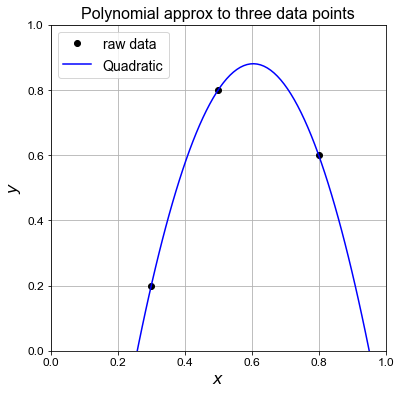

In [18]:
# three data point example
xi = [0.3, 0.5, 0.8]
yi = [0.2, 0.8, 0.6]

# use a function to construct the matrix above
# note than numpy already has a function to do this
V = np.vander(xi, increasing=True)


print('V = \n{}'.format(V))

# use a numpy linear algebra solver to solve the system
# uses an LU algorithm - see Lecture 3 for details!
a = np.linalg.solve(V, yi)

# output the coefficients for our quadratic we have computed
print('\n Our coefficients a = \n{}\n'.format(a))

# show that they are the same as is obtained from 
# numpy's polyfit function (for a quadratic)
# (which of course they should be, given we argued that this polynomial is unique)
print('The output from np.polyfit(x, y, 2) = \n {}'.format(np.polyfit(xi, yi, 2)))

# Note that the order is reversed because numpy.poly* assumes decreasing
# rather than the increasing powers of x which we have used above

# set up figure
fig = plt.figure(figsize=(6, 6))
ax1 = fig.add_subplot(111)

# plot the raw data
plot_raw_data(xi, yi, ax1)

# x locations at which to evaluate and plot the quadratic polynomial
x = np.linspace(0., 1., 100)

# Set up a polynomial from the coefficients using numpy rather than writing out.
# Use numpy.flip to reverse the coefficients as poly1d assume decreasing rather than
# increasing powers - look at documentation
p2 = np.poly1d(np.flip(a, 0))
print('\nWhich agrees with us as long as we reverse the order of our coefficients:')
print('np.flip(a, 0) = \n{}'.format(np.flip(a, 0)))

# the p2 here is a function so evaluate it at our x locations
y = p2(x)

# and plot
ax1.plot(x, y, 'b', label='Quadratic')

# add a figure title
ax1.set_title('Polynomial approx to three data points', fontsize=16)
# Add a legend
ax1.legend(loc='best', fontsize=14)
# set bounds
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)

### Vandermonde matrix and the monomial basis

As you may have guessed from the use of the notation $V$ for our matrix, and the use of the command `np.vander`, a matrix of this form has a name - it is called a [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix) - we saw this previously as an example of an ill-conditioned matrix.

Whether or not we have a well-defined interpolation problem, or whether it is under/over-determined, can be linked directly to whether we can solve the system, i.e. if $V$ is invertible (has a non-zero determinant).

This is the system we will always ultimately have to solve if we try and represent our data using a *monomial basis*, i.e. if we assume a set of basis functions made up of simple monomials:

$$ 1,\; x,\; x^2,\; \ldots,\; x^N,$$

and that the function we are looking for is formed from a linear combination of these basis functions:

$$\sum_{i=0}^N\,a_ix^i,$$

which is of course just our polynomial $P_N(x)$ defined above.


<br>


#### Can we do better?

While this is perhaps the simplest (it's consistent with the simplest definition of a polynomial we are used to seeing) and the most obvious way to proceed, we should ask ourselves can we do better? 

i.e. can we try to use a different (less obvious) *basis* that might mean we don't have a (potentially large, and difficult) matrix system to solve?

### Lagrange polynomial 

The answer is yes, and [Lagrange polynomials](http://mathworld.wolfram.com/LagrangeInterpolatingPolynomial.html) are a particularly popular choice for constructing an interpolant for a given data set. 

Given a set of $(N+1)$ points as above, the Lagrange polynomial is defined as the linear combination

$$L(x) := \sum_{i=0}^{N} y_i \ell_i(x),$$

where the $\ell_i(x)$ are a new choice for our basis functions (different to the monomials, but the same idea in that they form a <a href="https://en.wikipedia.org/wiki/Basis_(linear_algebra)">*basis*</a>), and the $y_i$ are the $N+1$ weights/coefficients corresponding to this basis.


<br>

>Note that this is not a typo and we are not re-using notation here - we will see that **the weights in this approach actually ARE the same as the $y_i$'s making up the data we are interpolating!**

<br>


This is the whole point of this approach - we no longer have to compute the weights by inverting a matrix system as we had to above with monomials. 

Now, through the construction of this approach, we know the weights directly from the given data.

We will see two things below:


1. Due to the nature of the basis functions, once multiplied out this will also turn out to be a degree $N$ polynomial.


2. Due to the uniqueness of polynomial interpolation we discussed above, we can conclude that the $L(x)$ function we obtain will be the same polynomial as $P_N(x)$ introduced/derived in a different manner above.

<br>

What I mean by this is, for example, 

$$P_N(x) = 2 + 3x + 4x^2$$ 

is exactly the same polynomial as 

$$L(x) = 1(x-1)(x-2) - 9x(x-2) + 12x(x-1),$$  

just written in a different way, or equivalently written using a **different basis**.

<br>

You can check this by multiplying our the second expression, or we could just plot the two to confirm:

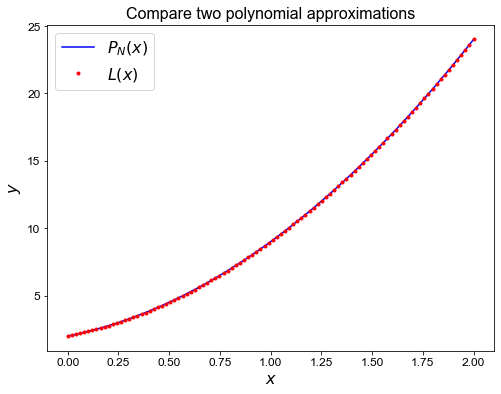

In [19]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))
x = np.linspace(0,2,100)
P = 2. + 3. * x + 4. * x**2
L = 1. * (x-1) * (x-2) - 9. * x * (x-2) + 12. * x * (x-1)
ax1.plot(x, P, 'b', label='$P_N(x)$')
ax1.plot(x, L, 'r.', label='$L(x)$')
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('Compare two polynomial approximations', fontsize=16)
ax1.legend(loc='best', fontsize=16)

The above shows that these two ways of writing the polynomial are indeed equivalent.

We can make a further observation - the polynomial

$$L(x) = 1(x-1)(x-2) - 9x(x-2) + 12x(x-1).$$  

is written in a way that means that it is particularly trivial to evaluate it at the points $x=0$, $x=1$ and $x=2$ - what are the values of the polynomial at the $x$ locations in this case?

### Lagrange basis polynomials

The functions $\ell_i(x)$ are known as the *Lagrange basis polynomials* and are defined by the product

$$\ell_i(x) := \prod_{\begin{smallmatrix}0\le m\le N\\ m\neq i\end{smallmatrix}} \frac{x-x_m}{x_i-x_m} = \frac{(x-x_0)}{(x_i-x_0)} \cdots \frac{(x-x_{i-1})}{(x_i-x_{i-1})} \frac{(x-x_{i+1})}{(x_i-x_{i+1})} \cdots \frac{(x-x_N)}{(x_i-x_N)},$$

where $0\le i\le N$.

In the simplest $N=0$ case (*i.e.* when there is only one point in the data set), there is only one Lagrange basis polynomial which is defined by convention as $\ell_0:=1$. We can see that this makes sense by considering the expression for $L(x)$ and the fact that we stated that for Lagrange polynomials the weights are the $y_i$'s.

Notice from the definition of these basis functions the clear requirement that no two $x_i$ are the same, $x_i - x_m \neq 0$, so this expression is always well-defined (i.e. we never get a divide by zero!). 

The reason pairs $x_i = x_j$ with $y_i\neq y_j$ are not allowed is that no interpolation function $L$ such that $y_i = L(x_i)$ would exist; a **function** can only return a single unique value for each argument $x_i$ (this uniqueness is part of the definition of a <a href="https://en.wikipedia.org/wiki/Function_(mathematics)">*function*</a>).

On the other hand, if also $y_i = y_j$, then those two points would actually be one single point - we would thus have redundant data and really we could throw one away and would be looking for a degree $N-1$ degree to interpolate $N$ **distinct** data points.

For all $j\neq i$, $\ell_j(x)$ includes the term $(x-x_i)$ in the numerator (the thing on the top), so the whole product will be zero when evaluated at $x=x_i$:

$$\ell_{j\ne i}(x_i) = \prod_{m\neq j} \frac{x_i-x_m}{x_j-x_m} = \frac{(x_i-x_0)}{(x_j-x_0)} \cdots \frac{(x_i-x_i)}{(x_j-x_i)} \cdots \frac{(x_i-x_N)}{(x_j-x_N)} = 0.$$

On the other hand a basis function $i$ evaluated at location $x_i$ returns 1:

$$\ell_i(x_i) = \prod_{m\neq i} \frac{x_i-x_m}{x_i-x_m} = 1.$$

In other words, all of the basis functions/polynomials are zero at the exact locations of the data ($x=x_i$), except for $\ell_i(x)$, for which it holds that $\ell_i(x_i)=1$, because it lacks the $(x-x_i)$ term in the product.

It follows that 

$$y_i \ell_i(x_i)=y_i,$$ 

and therefore at each point $x_i$

$$L(x_i)=0+0+\dots + y_i + 0 +\ldots +0=y_i,$$ 

showing that $L$ does indeed interpolate (i.e. pass through) the data points exactly, as is required of an interpolant.

### Example: the linear case

Here we have $N=1$ and $N+1=2$ data points: $\{(x_0,y_0),(x_1,y_1)\}$.

The Lagrange basis polynomials are then

$$ \ell_0(x) = \frac{x - x_1}{x_0-x_1}, \;\;\;\;\;\;\;\;  \ell_1(x) = \frac{x - x_0}{x_1-x_0}, $$

and the Lagrange polynomial is

$$ y = L(x) = \ell_0(x)\,y_0 + \ell_1(x)\,y_1 = \frac{x - x_1}{x_0-x_1}\,y_0 + \frac{x - x_0}{x_1-x_0}\,y_1, $$

which with a little rearrangement can be seen to be exactly the same as the linear polynomial we derived by inverting the $2\times 2$ Vandermonde system above (or as only $2\times 2$ actually obtained by substitution.  See the first homework question for a demonstration of the equivalence of the two obtained polynomials).

So we have arrived at the same result via a different route (specifically through the use of different basis functions). 

As said above this equivalence is to be expected as the minimal degree polynomial which passes through the data points is *unique*, so even if we take a different route we will arrive at the same end result.

Note the big difference (advantage) with this approach is that we could find the polynomial without the need to invert a matrix system - by construction the weights are the $y_i$'s which we know, so we do not need to compute them as we did with the monomial basis.

## Using scipy.interpolate

Before we go ahead and write some code to implement this theory and compute the Lagrange polynomial ourselves [see homework], let us note that the majority of the algorithms we consider in this course will already have implementations out there (e.g. in the libraries NumPy, SciPy, ...). 

We will implement many ourselves to aid understanding, and to practice our coding.

**Many would argue strongly that you don't truly understand an algorithm until you implement (and debug!!!) it yourself.**

For example, we can use [scipy.interpolate.lagrange](http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html)
from Python's [SciPy](http://www.scipy.org) library to generate the Lagrange polynomial for a dataset as shown below.

Note: SciPy provides a [wide range of interpolators](http://docs.scipy.org/doc/scipy/reference/interpolate.html) with many different properties which we do not have time to go into in this course. 

When you need to interpolate data for your specific application then you should look at the literature (or indeed the remainder of this lecture) to ensure that you are using an appropriate one.

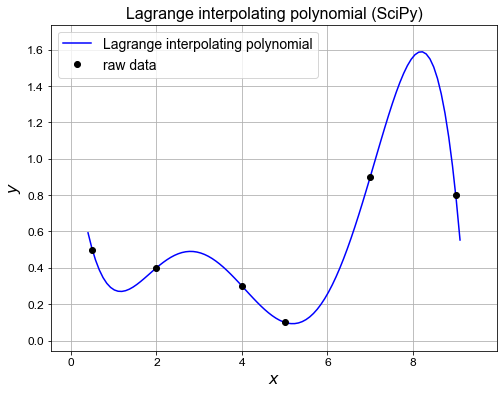

In [20]:
### Our raw data from earlier - you can also test on our three data point example
xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])

# Create the Lagrange polynomial for the given points.
lp = si.lagrange(xi, yi)
# recall above that we executed 'import scipy.interpolate as si'
# and so this line is calling the 'lagrange' function from the 
# 'interpolate' sub-package within scipy.

# Evaluate this function at a high resolution (100 points here) so that 
# we get a smooth well-resolved line when we plot our polynomial
x = np.linspace(0.4, 9.1, 100)

# set up the figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# actually plot (x,y)=(x,lp(x)) on the axes with the label ax1
ax1.plot(x, lp(x), 'b', label='Lagrange interpolating polynomial')

# Overlay raw data on the same axes
plot_raw_data(xi, yi, ax1)
ax1.set_title('Lagrange interpolating polynomial (SciPy)', fontsize=16)

# Add a legend
ax1.legend(loc='best', fontsize=14);

The blue line is a **degree 5** (or less - we'd need to check for any zero coefficients to confirm it's not less that 5) polynomial which passes exactly through the **6 data points**.

<br>

A homework question asks you to implement functions to compute the Lagrange basis polynomials and the Lagrange polynomial yourself and compare against this SciPy example.

##  Approximating a function

Rather than approximating/interpolating arbitrary discrete data given to us somehow (e.g. from observations, or from a very expensive computer code which has been run previously), we can of course use the same methods to approximate a given function. 

We may want to do this in order to approximate a complex/expensive function with a simpler, cheaper interpolating function.

Our "function" may be a large expensive PDE solver for example.

### A simple example

For example, consider the function $y(x)=x^3$ with data provided at  equally spaced points.  

Let's see what happens if we evaluate with Lagrange polynomials of degree 0, 1 and 2.

[Note that since in this case we are given the underlying function, we can in principle choose the locations and number of data points, so for the degree 0, 1 and 2 Lagrange polynomials we first need to evaluate the underlying function 1, 2 and 3 times respectively. For simplicity below we just choose these to be evenly distributed in our $x$ domain of interest].

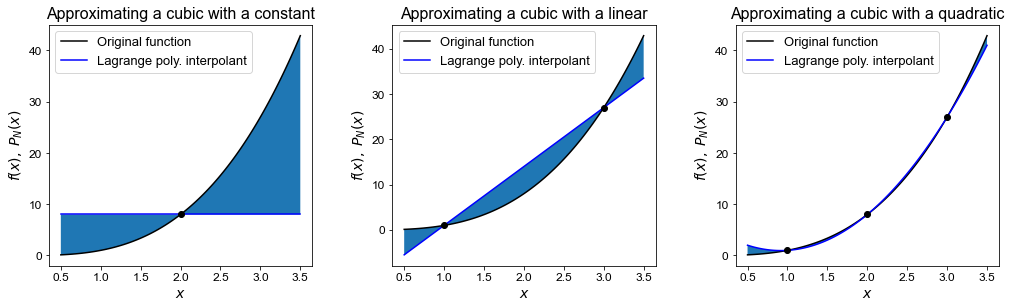

In [21]:
# this is the function we are going to approximate with low degree polynomials
def func_x3(x):
    return x**3

# as we will plot our approximation several times let's write a small function to do this
def plot_approximation(f, xi, ax):
    """Function that plots an original function and its Lagrange polynomial approximation. 

    Parameters
    ----------
    f : callable
        Original function
    xi : array_like
        The x-component of the data
    ax : matplotlib axes
        The axes to plot on
    """
    # Relatively fine x points for plotting our functions
    x = np.linspace(0.5, 3.5, 100)
    # Plot the original function
    ax.plot(x, f(x), 'k', label = 'Original function')

    # construct and plot the Lagrange polynomial
    lp = si.lagrange(xi, f(xi))
    # evaluate and plot the Lagrange polynomial at the x points
    ax.plot(x, lp(x), 'b', label = 'Lagrange poly. interpolant')

    # shade the region between the two to emphasise the difference
    ax.fill_between(x, f(x), lp(x))

    # add some axis labels
    ax.set_xlabel('$x$', fontsize=14)
    ax.set_ylabel('$f(x), \; P_N(x)$', fontsize=14)

    # and add on top the interpolation points
    ax.plot(xi, f(xi), 'ko')

    # and a legend
    ax.legend(loc='best', fontsize=13)


# set up our figs for plotting - we want three subplots arranged in a 1x3 grid
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
# add some padding otherwise axes the labels can overlap with the next subplot
fig.tight_layout(w_pad=4) 

# Plot the L0 degree 0 Lagrange poly and visualise the error
plot_approximation(func_x3, np.array([2., ]), ax1)
ax1.set_title('Approximating a cubic with a constant', fontsize=16)

# Plot the L1 degree 1 Lagrange poly and visualise the error
plot_approximation(func_x3, np.array([1., 3.]), ax2)
ax2.set_title('Approximating a cubic with a linear', fontsize=16)

# Plot the L2 degree 2 Lagrange poly and visualise the error
plot_approximation(func_x3, np.array([1., 2., 3.]), ax3)
ax3.set_title('Approximating a cubic with a quadratic', fontsize=16);

### Error in Lagrange interpolation

Note that it can be proven that in the case where we are interpolating a known function (e.g. a complicated non-polynomial function such as $\exp$ or $\sin$) by a simpler polynomial, the error at any point we evaluate the interpolant at is proportional to:


- (1) the distance of that point from any of the data points (which makes sense as the error is obviously zero at the data points),


- (2) and to the $(N+1)$-th derivative of that function evaluated at *some* location within the bounds of the data.  


i.e. the more complicated (sharply varying) the function is, the higher the error *could* be.

[You should note similarities here with the Taylor series expansion we saw in an earlier lecture].

This result is sometimes called the [*Lagrange remainder theorem*](https://en.wikipedia.org/wiki/Polynomial_interpolation#Interpolation_error).

We won't prove this here, but it will be useful in the next lecture if we write it down now.

<div class="advanced">
    
### Aside: The Lagrange Remainder Theorem  [$\star\star$]

For $N\ge 0$, let $f(x)$ be a function with at least $N+1$ continuous derivatives over the interval $[a,b]$, 

(the mathematical way of writing this is $f \in C^{N+1}[a,b]$ - see [http://mathworld.wolfram.com/C-kFunction.html](http://mathworld.wolfram.com/C-kFunction.html) for more details on this if interested) 

and let $\;\;x_0<x_1<\ldots<x_N\;\;$ be $N+1$ distinct points in $[a,b]$. 

Then the degree ($\le$) $N$ polynomial interpolating $f(x)$ at these points, $P_N(x)$, satisfies


$$ f(x) = P_N(x) + R_N(x) \;\;\;\;\;\; \text{or} \;\;\;\;\;\; R_N(x) = f(x) - P_N(x) \;\;\;\;\;\; \forall x\in[a,b],$$


where $R_N(x)$ is the *remainder*, or the [*interpolation error*](https://en.wikipedia.org/wiki/Polynomial_interpolation#Interpolation_error), and takes the form


\begin{align*} 
R_N(x) & = \frac{(x-x_0)(x-x_1)\cdots(x-x_N)}{(N+1)!} \, f^{(N+1)}(c_x) \\[10pt]
& = \Psi_N(x)\,\frac{f^{(N+1)}(c_x)}{(N+1)!},
\end{align*}


where $c_x$ is *some* value/point between the maximum and minimum of $x_0, \ldots, x_N$ and $x$,

and where 

$$ \Psi_N(x) := \prod^N_{i=0} (x - x_i) = (x-x_0)(x-x_1)\cdots(x-x_N). $$


<br>

This gives us an expression for the error, but we don't know what $c_x$ is and so it's not that helpful.  

But we can turn this into an upper bound on the error:


</div>

<div class="advanced">

If you want you can think of the unknown $c_x$ as being some value $c_x \in (a,b)$, and by setting 

$$M:=\max_{x\in(a,b)}\, \left| f^{(N+1)}(x) \right|,$$ 

i.e. defining $M$ to be the *maximum* value of the ($N+1$)-th derivative over our interval, 


<br>

<br>


then we are left with the error **bound** that no longer depends on $c_x$:

$$
\boxed{
\left| f(x) - P_N(x) \right| \le \frac{1}{(N+1)!}\, M\, \left|\Psi_N(x)\right|,  \quad
M:=\max_{x\in(a,b)}\, \left| f^{(N+1)}(x) \right|, \quad
\Psi_N(x) := \prod^N_{i=0} (x - x_i) = (x-x_0)(x-x_1)\cdots(x-x_N).
}
$$

</div>

<div class="advanced">

#### Observations

This looks complicated, but we can make multiple observations based on this quite easily
(some which just reinforce things that are obvious, or that we have seen already):


<br>

- (1) The error is zero at the interpolation points or nodes (as $\Psi_N(x)$ vanishes at these points).

<br>

- (2) The error is zero everywhere if $f$ is a polynomial of degree $N$ or less (as then $f^{N+1}(x)\equiv 0$), which is of course equivalent to saying that we can approximate a given polynomial function exactly if we match degrees.

<br>

- (3) This result is only true for smooth functions and essentially says that smooth functions behave like polynomials (cf. a truncated [Taylor series](https://en.wikipedia.org/wiki/Taylor_series) expansion) - this is why polynomial interpolation works for smooth functions.

<br>

- (4) However, this mathematical result (and hence all of our observations based on it) are invalid when $f$ has discontinuous derivatives (is not smooth) - because $f$ no longer behaves like a polynomial (e.g. it can do what it likes between the known points).

<br>

- (5) Functions with larger $(N+1)$-st derivative will tend to have larger interpolation errors.

<br>

- (6) For a given function $f$, minimising the interpolation error for a given choice on $N$ is effectively the same as minimising $\left|\Psi_N(x)\right|$ for $x\in [a,b]$.  In addition, the structure of the error (i.e. how it varies in space) is due to the spatial structure of $\Psi$ (as the other terms do not depend on $x$).

<br>

<br>

The final point is important - it leads to methods where the nodes are not equally spaces, e.g. [Chebyshev nodes](https://en.wikipedia.org/wiki/Chebyshev_nodes) and Chebyshev polynomial interpolation.

</div>

<div class="advanced">

### Simple example

What does this tell us for our simple example $f(x)=x^3$?

As for our plots above with this example, let's assume $[a,b]=[0.5, 3.5]$ and compute the error (estimate or bound) based upon the above theory.

We need the maximum value of the appropriate (i.e. dependent on our polynomial degree) degree derivative over the interval:

$$\begin{align*}
N & = 0: \;\;\;\; & \max_{x\in(a,b)}f'(x) & = \left. 3x^2 \right|_{x = 3.5} = 36.75,\\[15pt]
N & = 1: \;\;\;\; & \max_{x\in(a,b)}f''(x) & = \left. 6x \right|_{x = 3.5} = 21,\\[15pt]
N & = 2: \;\;\;\; & \max_{x\in(a,b)}f'''(x) & =  6, \\[15pt]
N & = 3: \;\;\;\; & \max_{x\in(a,b)}f^{(4)}(x) & = 0. 
\end{align*}$$

Let's now evaluate the actual error between the function and the interpolating polynomials and see how well these error estimates agree, or bound this error.

</div>

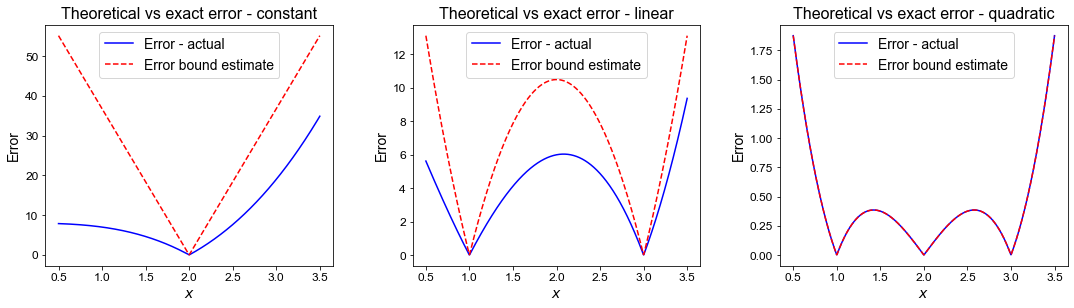

In [22]:
from math import factorial

def func_x3(x):
    return x**3

def plot_errors(f, xi, ax):   
    N = len(xi) - 1

    # M contains the maximum derivative values, as computed above;
    # a component (the N-th) of which appear as one factor in our error estimate.
    M = [36.75, 21., 6.]

    # for the approximation with a Lagrange polynomial
    lp = si.lagrange(xi, f(xi))

    # plot the error between the function f(x) and the Lagrange polynomial over [0.5,3.5]
    x = np.linspace(0.5, 3.5, 1000)
    ax.plot(x, np.abs(f(x) - lp(x)), 'b', label = 'Error - actual')

    # compute the Psi function defined above, here using "list comprehension"
    Psi = np.prod([(x - xi[i]) for i in range(N+1)], axis=0)

    # our error estimate is (1/(N+1)!) * M * |Psi|.  Plot this:
    ax.plot(x, (1./factorial(N+1)) * M[N] * np.abs(Psi), 'r--', label = 'Error bound estimate')

    # add labels and legend
    ax.set_xlabel('$x$', fontsize=14)
    ax.set_ylabel('Error', fontsize=14)
    ax.legend(loc='best', fontsize=14)
    
# set up our figs for plotting - we want three subplots arranged in a 1x3 grid
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
fig.tight_layout(w_pad=4)  # add some padding otherwise axes labels overlap

# L0
plot_errors(func_x3, np.array([2., ]), ax1)
ax1.set_title('Theoretical vs exact error - constant', fontsize=16)

# L1
plot_errors(func_x3, np.array([1., 3.]), ax2)
ax2.set_title('Theoretical vs exact error - linear', fontsize=16)

# L2
plot_errors(func_x3, np.array([1., 2., 3.]), ax3)
ax3.set_title('Theoretical vs exact error - quadratic', fontsize=16);

<div class="advanced">

#### Comments

1. Our error bound is indeed an **upper bound** on the actual error.


2. Both the actual error and the error bound are zero at the data locations. 


3. For this example (i.e. a 'simple' cubic function), our error bound is actually exactly equal to the real error in the case of the quadratic approximation - why is this?


<br>

[When an error bound value is very close to the actual error we call it a *tight* bound - tighter bounds are obviously more useful in practice although not always necessary for proving theoretical results - <https://en.wikipedia.org/wiki/Upper_and_lower_bounds>].

</div>

<div class="optional">

### A more problematic example [$\star$]

[This is an illustrative example to demonstrate how things can go wrong, especially when using high-degree approximating polynomials.]

<br>

Approximating the [Runge function](https://en.wikipedia.org/wiki/Runge%27s_phenomenon):

$$f(x) := \frac{1}{1 + 25 x^2},$$

using equally spaced data points in the interval $[-1,1]$ is a famous example demonstrating how/where polynomial interpolation can go wrong!

</div>

<ipython-input-23-faa0ff3308a9>:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fig, axs = plt.subplots(2, np.int(len(degrees)/2), figsize=(12, 8))


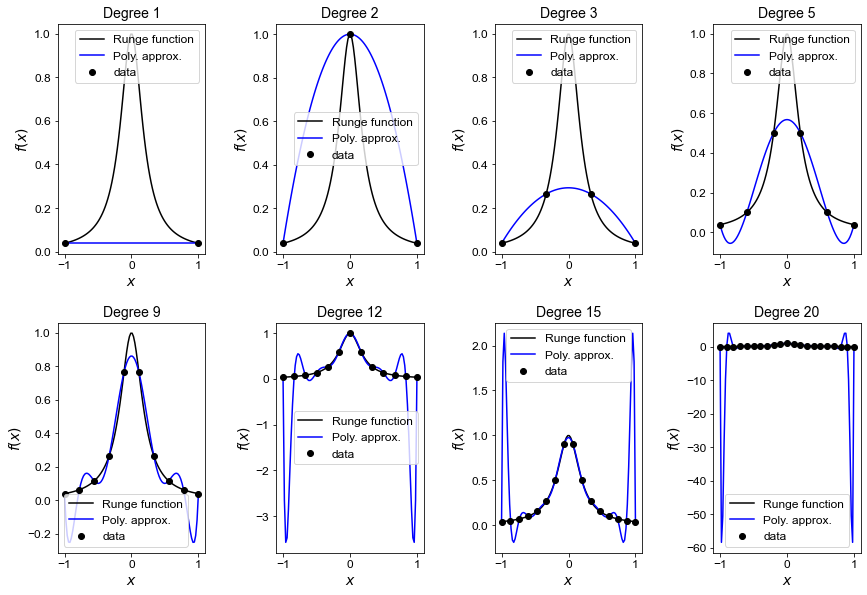

In [23]:
# define the runge function
def runge(x):
    return 1.0 / (1.0 + 25.0 * x**2)

def plot_approximation(f, xi, ax):
    """Function to plot exact function f (e.g. Runge) and its Lagrange polynomial approximation.

    Parameters
    ----------
    f : callable
        The Runge function
    xi : array_like
        The x-component of the data
    ax : matplotlib axes
        The axes to plot on
    """
    x = np.linspace(-1.0, 1.0, 100)
    ax.plot(x, f(x), 'k', label='Runge function')

    lp = si.lagrange(xi, f(xi))
    ax.plot(x, lp(x), 'b', label='Poly. approx.')

    ax.set_xlabel('$x$', fontsize=14)
    ax.set_ylabel('$f(x)$', fontsize=14)


# the problem gets worse at higher degree - list of degrees to consider
degrees = [1, 2, 3, 5, 9, 12, 15, 20]

# set up our figs for plotting
fig, axs = plt.subplots(2, np.int(len(degrees)/2), figsize=(12, 8))
# this turns the 2D array of axes into a 1D vector we can easily call in the loop below
axs = axs.reshape(-1)
# add some padding otherwise axes labels overlap
fig.tight_layout(w_pad=3, h_pad=4)

# enumerate is a useful way to loop over something (here degrees) and have 
# an automatic counter - here i which we use to identify the correct axis
for i, degree in enumerate(degrees):
    xi = np.linspace(-1, 1, degree + 1)
    plot_approximation(runge, xi, axs[i])
    axs[i].plot(xi, runge(xi), 'ko', label='data')
    axs[i].set_title('Degree %i' % degree, fontsize=14)
    axs[i].legend(loc='best', fontsize=12)

<div class="optional">

#### Observations


- We see that for this problem, with increasing numbers of evenly spaced data points, the corresponding Lagrange polynomials, while doing a better and better job of approximating the underlying exact function *towards the middle* of the interval, do an increasingly bad job towards the *ends of the interval*.


- **Take home message:**  Try to avoid high-degree interpolants when the data is evenly spaced - as high-degree polynomials have a tendency to oscillate strongly between data points, especially at the ends.


- So interpolation here in regions of the domain would give huge errors. Imagine further what would happen if you tried to use one of these Lagrange polynomials to estimate a value for the Runge function slightly outside the $[-1,1]$ interval considered here (i.e. to **extrapolate**) - the result would clearly be terrible. This is therefore **also** a good example of why extrapolation in general should be undertaken with extreme caution!

</div>

<div class="optional">

#### An explanation

The reason for this behaviour is a consequence of two factors:


- Although smooth, the magnitude of the derivative of this function grows with $N$.


- The behaviour of the $\Psi$ quantity is such that, relatively speaking, with evenly spaced data points $\Psi(x)$ is much larger in the outer sub-intervals than it is the middle of the domain - as we can see in the following plot.


</div>

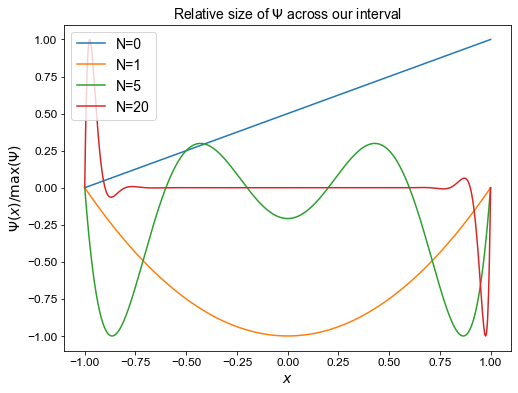

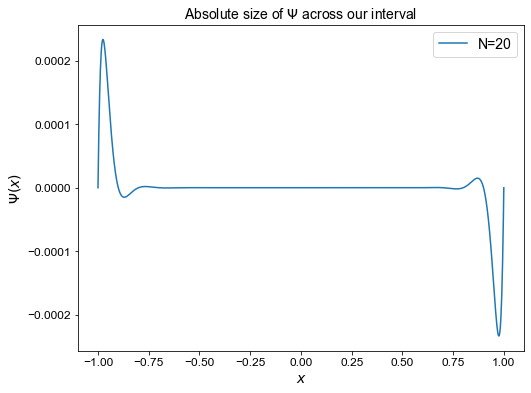

In [24]:
# plot Psi for different N values:
Ns = [0, 1,  5,  20]

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

x = np.linspace(-1., 1., 1000)
for N in Ns:
    xi = np.linspace(-1, 1, N+1)
    Psi = np.prod([(x - xii) for xii in xi],axis=0)
    ax.plot(x, Psi / max( 1.e-10, np.max(np.abs(Psi)) ), label='N='+str(N) ) 
    ax.set_xlabel('$x$', fontsize=14)
    ax.set_ylabel('$\Psi(x)/\max({\Psi})$', fontsize=14)
    ax.set_title('Relative size of $\Psi$ across our interval', fontsize=14)
    ax.legend(loc='best', fontsize=14)
    
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
N = 20
xi = np.linspace(-1, 1, N+1)
Psi = np.prod([(x - xii) for xii in xi],axis=0)
ax.plot(x, Psi , label='N='+str(N) ) 
ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('$\Psi(x)$', fontsize=14)
ax.set_title('Absolute size of $\Psi$ across our interval', fontsize=14)
ax.legend(loc='best', fontsize=14);

<div class="optional">

#### A "solution"

There were three components making up the error bound - the factorial of $N+1$, a bound on the $(N+1)$-st derivative of the function, and $\Psi$. For a given function and polynomial degree, we have no control over the first two, but we do have some ability to control the third, and we saw above that the behaviour of $\Psi$ is indeed a problem as $N$ grows.

The above example can be "fixed" (or at least we can attempt to do a better job) by seeking to minimise $\Psi(x)$ over our entire interval (including the outer sub-intervals where above and in the homework we see there's a clear issue).

For a fixed $N$, the only thing we have the ability to change is to choose different $x_i$ data points, i.e. to sample our function at non-uniformly spaced *locations*.

This leads to other families of interpolation methods which we don't go into here.

</div>

<div class="optional">

## Piecewise polynomial interpolation   [$\star$]

An alternative approach to overcome the issues identified above which attempted to fit a *single* *high-degree* polynomial to multiple data points, is to split the data into pieces and fit a lower degree polynomial through each of these.

The piecewise (p/w) linear interpolation we saw near the start of this lecture would of course be an example of this.
    
</div>

<div class="optional">

### Piecewise-linear interpolant

The implementation of piecewise (p/w) linear interpolation would simply take two data points $(x_i,y_i)$ and $(x_{i+1},y_{i+1})$ in turn and fit a linear polynomial between them:


$$P_1^i(x) = \frac{ y_{i+1} - y_i }{ x_{i+1} - x_i }(x - x_i) + y_i,$$


the superscript $i$ is included to emphasise here that we are only considering one (the $i$-th) sub-interval.

This is easy to implement ourselves using this formula; we could reuse our Lagrange interpolation code, or indeed as we saw above simply plotting the data we get this result as well.

Alternatively we could just use the `numpy.polyfit` function to fit the appropriate degree polynomial to the data; we will see more on this below.

</div>

<div class="optional">

### Piecewise-quadratic interpolant

We can extend the linear example above by fitting a quadratic to three data points.

So for every 3 sets of points we fit a quadratic - to keep things simple we therefore require $3+2\times n$ data points, for some integer $n$ (i.e. the first set of three, and then sets of two extra as we reuse the last entry from the previous set of three as the first of the new set).  We therefore need to add a point to our example data set from above to satisfy this constraint.

This time we will make use of `numpy.polyfit` to construct each quadratic for simplicity.

</div>

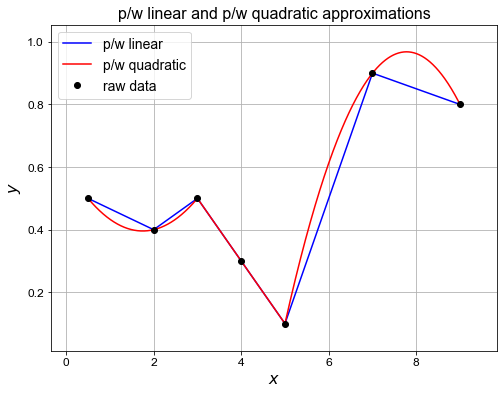

In [25]:
# Add an extra point to our data so that we have three complete sets of data
xi = np.array([0.5, 2.0, 3.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.5, 0.3, 0.1, 0.9, 0.8])

# construct the interpolant at these x points for plotting
x = np.linspace(np.min(xi), np.max(xi), 1000)

# initialise the value of our interpolant at x to zero
P2 = np.zeros_like(x)

# loop over collections of three data points from (xi,yi), i is the mid value
for i in range(1, len(xi), 2):
    # use polyfit to construct a local quadratic polynomial fit to data at i-1, i, i+1
    P2_loc = np.polyfit(xi[i - 1:i + 2], yi[i - 1:i + 2], 2)
    # use polyval to evaluate P2_loc at the x values for x in [x_{i-1},x_{i+1}]
    P2 += np.polyval(P2_loc, x) * (x >= xi[i - 1]) * (x <= xi[i + 1])

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)
ax1.plot(xi, yi, 'b', label='p/w linear')
ax1.plot(x, P2, 'r', label='p/w quadratic')
plot_raw_data(xi, yi, ax1)
ax1.set_title('p/w linear and p/w quadratic approximations', fontsize=16)
ax1.legend(loc='best', fontsize=14);

<div class="optional">

### Observations


- An obvious drawback of this we see from both the p/w linear and p/w quadratic examples above is that we lose *smoothness* - the interpolant now has jumps in its derivative (sharp corners).


- Since the degree two polynomial that fits through three data points is unique, we could also of course have used our Lagrange polynomial code rather than polyfit in the implementation above (ditto the linear case fit to two points). We used polyfit just to demonstrate/practice using other standard Python (NumPy) functions.


- Note that there are p/w interpolating options which preserve smoothness to varying degrees; these include [cubic splines](https://en.wikipedia.org/wiki/Spline_interpolation) and [cubic Hermite polynomials](https://en.wikipedia.org/wiki/Cubic_Hermite_spline) which we will introduce briefly next.
    

</div>

## Compare interpolation methods

We've discussed a lot of different methods to interpolate data in this lecture. Let's compare them:

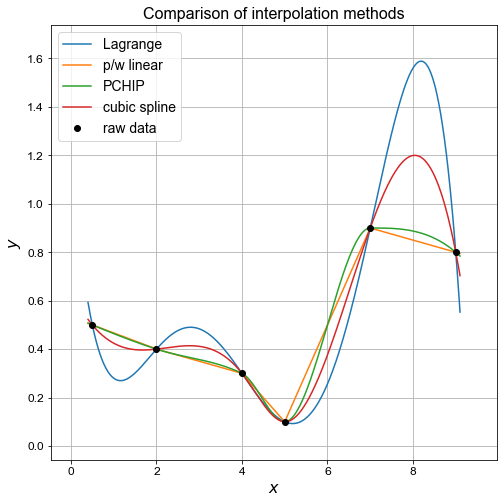

In [26]:
# consider the above example data again
xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])

# some of the interpolators we've seen in this lecture, evaluated using 
# SciPy for consistency but we know that our own codes agree with those we implemented
Plinear = si.interp1d(xi, yi, 'linear', fill_value='extrapolate')
PL = si.lagrange(xi, yi)
Pcs = si.CubicSpline(xi, yi)
Pchip = si.PchipInterpolator(xi, yi)

# set up figure
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

x = np.linspace(0.4, 9.1, 1000)

ax1.plot(x, PL(x), label='Lagrange')
ax1.plot(x, Plinear(x), label='p/w linear')
ax1.plot(x, Pchip(x), label='PCHIP')
ax1.plot(x, Pcs(x), label='cubic spline')

# Overlay raw data
plot_raw_data(xi, yi, ax1)

ax1.legend(loc='best', fontsize=14)
ax1.set_title('Comparison of interpolation methods', fontsize=16);

<div class="advanced">

## Other methods [$\star\star$]

Some additional methods were plotted in the comparison above for completeness:

### Cubic splines
This approach interpolates data with a piecewise cubic polynomial, see
[https://en.wikipedia.org/wiki/Spline_interpolation](https://en.wikipedia.org/wiki/Spline_interpolation).

Note that as opposed to the p/w quadratic example above, a cubic spline assumes a cubic polynomial **within** each interval between two data points.

Due to the use of a cubic polynomial within each interval, this approach can now be made to be twice continuously differentiable (i.e. first as well as second order derivatives are continuous).

<br>
<br>

### Piecewise Cubic Hermite Interpolating Polynomial (PCHIP) 

If we drop the requirement for continuity over second derivatives that comes with with the cubic splines  (and hence the conditions that were used to fix all the free parameters in the cubic) we can choose the remaining free parameters to achieve a different goal ...

If the (continuous) slopes between intervals are chosen in order for the interpolant to **preserve monotonicity** of the data then we have what is termed a [*p/w cubic Hermite interpolating polynomial*](https://uk.mathworks.com/help/matlab/ref/pchip.html) or a [*cubic Hermite spline*](https://en.wikipedia.org/wiki/Cubic_Hermite_spline).

*Monotonicity* here means that the interpolant remains within the bounds of the $y$-data - [https://en.wikipedia.org/wiki/Monotone_cubic_interpolation](https://en.wikipedia.org/wiki/Monotone_cubic_interpolation)


We will make use of [scipy.interpolate.PchipInterpolator](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.interpolate.PchipInterpolator.html#scipy.interpolate.PchipInterpolator)


Some properties:


- The interpolator preserves monotonicity in the interpolation data and does not overshoot if the data is not smooth.


- The first derivatives are guaranteed to be continuous, but the second derivatives may jump at the $x_i$ locations. So while being monotonic/bounded, the result is a bit less smooth than for cubic splines.


Let's see what it does for our data set case, and the problematic Runge function.


</div>

# Curve-fitting or regression

Curve-fitting in the [least squares](http://mathworld.wolfram.com/LeastSquaresFitting.html) sense is popular when the dataset contains noise (nearly always the case when dealing with real world data). 

This is straightforward to do for polynomials of different polynomial degree using [numpy.polyfit](http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html), as demonstrated in the example below where we construct polynomials of degree zero up to five (there being six data points).

In [27]:
# consider the above example data again
xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])

# Let's set up some space to store all the polynomial coefficients
# there are some redundancies here, and we have assumed we will only 
# consider polynomials up to degree N
N = 6
poly_coeffs = np.zeros((N, N))

for i in range(N):
    poly_coeffs[i, :(i+1)] = np.polyfit(xi, yi, i)

print('poly_coeffs = \n{}'.format(poly_coeffs))

poly_coeffs = 
[[ 0.5         0.          0.          0.          0.          0.        ]
 [ 0.0508044   0.26714649  0.          0.          0.          0.        ]
 [ 0.02013603 -0.13983999  0.55279339  0.          0.          0.        ]
 [-0.00552147  0.09889271 -0.43193108  0.75909819  0.          0.        ]
 [-0.00420655  0.07403681 -0.38492428  0.59251888  0.27906056  0.        ]
 [-0.00301599  0.06536037 -0.49614427  1.59623195 -2.08266478  1.20030166]]


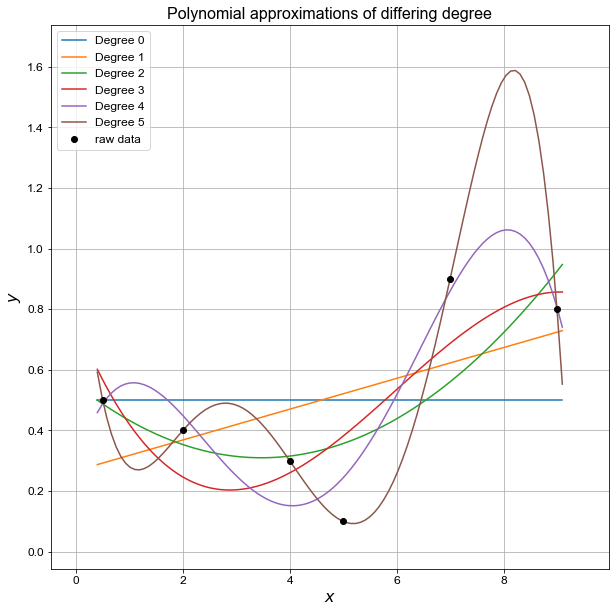

In [28]:
# now use these coefficients to plot the polynomials against the raw data

# set up figure
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

x = np.linspace(0.4, 9.1, 100)

for i in range(N):
    p = np.poly1d(poly_coeffs[i, :(i+1)])
    ax1.plot(x, p(x), label='Degree %i' % i)

# Overlay raw data
plot_raw_data(xi, yi, ax1)

ax1.legend(loc='best', fontsize = 12)
ax1.set_title('Polynomial approximations of differing degree', fontsize=16);

## Least squares error calculation

As described in the docs ([numpy.polyfit](http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html)), least squares fitting minimises the sum of the squares of the differences between the data provided and the polynomial approximation, i.e. it minimises the expression

$$E = \sum_{i=0}^{N} (P(x_i) - y_i)^2,$$

where $P(x_i)$ is the value of the polynomial function that has been fit to the data evaluated at point $x_i$, and $y_i$ is the $i^{th}$ data value.

<img src="https://upload.wikimedia.org/wikipedia/commons/b/b0/Linear_least_squares_example2.svg" style="width: 300px">

*(Wikipedia: https://en.wikipedia.org/wiki/Linear_least_squares) We're computing the sum of the squares of the distances indicated in green.*

[Recall that we considered the problem of fitting a linear line which minimised the two-norm of the errors to the data (and compared to other norms) in an earlier lecture when we were considering the impact of outliers in the data].

Let's write a Python function that evaluates the squared error, $E$, and use this function to evaluate the error for each of the polynomials calculated above.

In [29]:
# we use the square of the difference to ensure each contribution
# to the total error is positive, otherwise errors of different signs
# could/would cancel out giving a false estimate of how good our approximation is


def sqr_error(p, xi, yi):
    """"function to evaluate the sum of square of errors"""
    # first compute the square of the differences
    diff2 = (p(xi)-yi)**2
    # and return their sum
    return diff2.sum()


for i in range(N):
    p = np.poly1d(poly_coeffs[i, :(i+1)])
    print('square of the difference between the data and the '
          'polynomial of degree {0:1d} = {1:.8e}'.format(i, sqr_error(p, xi, yi)))

square of the difference between the data and the polynomial of degree 0 = 4.60000000e-01
square of the difference between the data and the polynomial of degree 1 = 3.32988992e-01
square of the difference between the data and the polynomial of degree 2 = 1.99478242e-01
square of the difference between the data and the polynomial of degree 3 = 1.57303437e-01
square of the difference between the data and the polynomial of degree 4 = 4.69232378e-02
square of the difference between the data and the polynomial of degree 5 = 1.10973375e-25


### Observations


- As expected the error drops as we approximate the data with higher degree polynomials.


- Also as we expect the error is zero (to machine precision) when we fit an degree five polynomial to the six data points (as this is the polynomial that goes through every data point exactly - and we're doing interpolation rather than curve-fitting).


<div class="optional">

## Example: Submarine landslide size in the North Atlantic

Consider the data file [Length-Width.dat](data/Length-Width.dat) (located in the data directory) which gives the lengths and widths of submarine landslides in the North Atlantic basin [from [Huhnerbach & Masson, 2004](http://www.sciencedirect.com/science/article/pii/S0025322704002774), Fig. 7].  

We want to try and fit a linear best fit line to the data in log-log space (we will see more examples of this sort of thing in later lectures when we fit a polynomial to error convergence data - we will explain there the reason for considering logs).

Since we are attempting to fit a simple model to data we can consider this curve-fitting exercise as an example of a regression analysis.

In the script below we will first use `numpy.polyfit` as we have above to fit a linear polynomial to the data in a least square sense.

We will then use `scipy.stats.linregress` to perform *linear regression* using a scipy implementation of linear regression.

We will compare the slope and the intercept (the two coefficients in the linear polynomial) between the two approaches.  

Linear regression also returns by default a [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) or R-squared (R2) value. We will also calculate this from first principles using the `numpy.polyfit` data and check these values agree.

Reference: [V. Huhnerbach, D.G. Masson, Landslides in the North Atlantic and its adjacent seas:
an analysis of their morphology, setting and behaviour, Marine Geology 213 (2004) 343 – 362.](http://www.sciencedirect.com/science/article/pii/S0025322704002774)

</div>

Lagrange polynomial coefficients = [1.0266104  0.37698383]
R squared value calculated from Lagrange polynomial fit to the data in log-log space = 0.5653751967433511

Linear regression ... slope, intercept, r_value = 1.02661040, 0.37698383, 0.75191435
r_value squared = 0.56537520


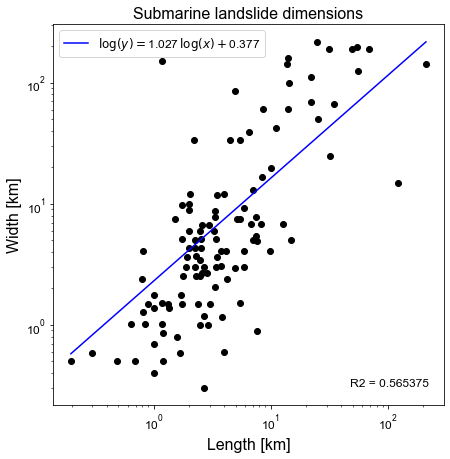

In [30]:
import scipy.stats as ss

file = open("data/Length-Width.dat", 'r')

xi = []
yi = []
for line in file:
    xi.append(float(line.split()[0]))
    yi.append(float(line.split()[1]))
xi = np.array(xi)
yi = np.array(yi)

# set up figure
fig, ax1 = plt.subplots(1, 1, figsize=(7, 7))
# plot the raw data
ax1.loglog(xi, yi, 'ko')

# fit a linear line to the log of the data using numpy.polyfit
logxi = np.log(xi)
logyi = np.log(yi)
poly_coeffs = np.polyfit(logxi, logyi, 1)
# Construct the corresponding polynomial function from these coefficients
p1 = np.poly1d(poly_coeffs)
# print the polynomial coefficients to compare with regression
print('Lagrange polynomial coefficients = {}'.format(poly_coeffs))

# calculate and print an R-squared value for this fit using the mathematical
# definition from https://en.wikipedia.org/wiki/Coefficient_of_determination
SS_res = sqr_error(p1, logxi, logyi)
SS_tot = np.sum((np.mean(logyi) - logyi)**2)
r2 = 1. - SS_res/SS_tot
print('R squared value calculated from Lagrange polynomial fit to the data in log-log space = {}\n'.format(r2))

# only need two points to plot a linear
x = np.linspace(min(xi), max(xi), 2)
ax1.loglog(x, p1(x), 'b', label='$\log(y) = $%.3f$\,\log(x) + $%.3f' %
           (poly_coeffs[0], poly_coeffs[1]))
ax1.legend(loc='best', fontsize=12)

# check values computed above against scipy's linear regression
slope, intercept, r_value, p_value, std_err = ss.linregress(logxi, logyi)
print('Linear regression ... slope, intercept, r_value = {0:.8f}, {1:.8f}, {2:.8f}'\
      .format(slope, intercept, r_value))
print('r_value squared = {:.8f}'.format(r_value**2))


ax1.set_title('Submarine landslide dimensions', fontsize=16)
ax1.set_xlabel('Length [km]', fontsize=16)
ax1.set_ylabel('Width [km]', fontsize=16)

ax1.text(0.76, 0.05, 'R2 = %.6f' % r2, transform=ax1.transAxes);

# Extrapolation

*Interpolation* by definition is used to estimate $y$ for values of $x$ within the bounds of the available data with some confidence. 

*Extrapolation* on the other hand is the process of estimating (e.g. using the interpolating function) $y$ *outside* the bounds of the available data. 

Extrapolation requires a great deal of care as it will become increasingly inaccurate as you go further out of bounds, and as we have seen in some of the examples above this inaccuracy may be quite large even if we are only a little outside the bounds of the data.


<br>

Note that once we've performed regression or curve-fitting (with a polynomial say) to a cloud of data points, the same observations on using this polynomial or function to estimate values within the range of the data, or without, i.e. whether we use our function to interpolate or extrapolate, still holds.

See for example [Extrapolation: useful tool or dangerous data](https://medium.com/unpackai/extrapolation-e9e430519b8a)

## Extrapolation example

Let's recreate the plots in the example above for different degrees of polynomial, but now set the x-range from -2.0 to 11.0 to see what would happen if we evaluated the polynomial outside the range of the data.

Text(0.5, 1.0, 'Extrapolation example - narrower interval')

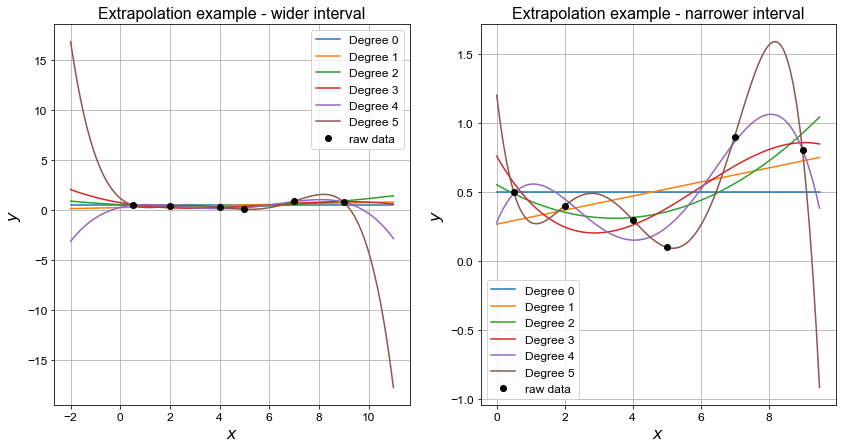

In [31]:
# consider the above example data again
xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])

# Let's set up some space to store all the polynomial coefficients
# there are some redundancies here, and we have assumed we will only 
# consider polynomials up to degree N
N = 6
poly_coeffs = np.zeros((N, N))

for i in range(N):
    poly_coeffs[i, :(i+1)] = np.polyfit(xi, yi, i)

# plot over a couple of different x ranges
x1 = np.linspace(-2., 11., 100)
x2 = np.linspace(0., 9.5, 100)

# set up figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

for i in range(N):
    p = np.poly1d(poly_coeffs[i, :(i+1)])
    ax1.plot(x1, p(x1), label='Degree %i' % i)

# Overlay raw data
plot_raw_data(xi, yi, ax1)
# Add a legend
ax1.legend(loc='best')
ax1.set_title('Extrapolation example - wider interval', fontsize=16)

# NB. if you set the limits of the x data to numpy.linspace(0., 9.5, 100)
# and replot this will result in you zooming in on the data to better see
# how each polynomial fits the data, but less clearly shows the major
# problem with extrapolation.

for i in range(N):
    p = np.poly1d(poly_coeffs[i, :(i+1)])
    ax2.plot(x2, p(x2), label='Degree %i' % i)

# Overlay raw data
plot_raw_data(xi, yi, ax2)
# Add a legend
ax2.legend(loc='best')
ax2.set_title('Extrapolation example - narrower interval', fontsize=16)

# Quadrature (very brief introduction)


#### Warning

Note that there is scope for confusion with this content over the **degree polynomial used within a single interval** and the **number of subintervals that our total interval of interest may be split up into**.  

We will attempt to be consistent and use $N$ to refer to the "degree" of the polynomial (within an interval or subinterval), and $n$ to refer to the total number of "subintervals" (or sometimes "bins") we are using to cover our entire interval.
    
<br>
    
[Increasing either $N$ or $n$ should in principle lead to two results for a user ... what are they?]

## Introduction

### Numerical integration or "Quadrature"

[*Quadrature*](https://en.wikipedia.org/wiki/Numerical_integration) is the term used for numerical evaluation of a *definite* (i.e. over a range $[a,b]$) integral, or in 1D finding the area under a curve. 

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f2/Integral_as_region_under_curve.svg" style="width: 400px">

*(Wikipedia: https://upload.wikimedia.org/wikipedia/commons/f/f2/Integral_as_region_under_curve.svg)*

<br>

If we have a function in 1D, $f(x)$, defined between $a$ and $b$, the *definite* [*integral*](http://en.wikipedia.org/wiki/Integral) over $[a,b]$ is defined as 

$$ I := \int_{a}^{b} f\left ( x \right )\,dx, $$

and its result is the area under the curve. 


[We'll generally use the notation $I$ for this quantity we wish to calculate, although $S$ is used in the figure above taken from Wikipedia!].

Knowing the value of the area under a curve is important to all kinds of applications. 

However, many expressions/functions we may encounter for these curves are difficult to integrate analytically, or a closed form expression for the function which governs their shape is unknown, and we may only have data at a finite number of discrete points (cf. one of the interpolation use cases from above), and thus need to evaluate the integral approximately/numerically.


### Some calculus

[<http://www.differencebetween.net/science/mathematics-statistics/difference-between-definite-and-indefinite-integrals/>]


<br>


Integration is an essential part of calculus, being the inverse of differentiation.  

Indeed if we drop the integration limits in the expression above (then we have *indefinite* integration) the result is a function: 

$$F(x) := \int f\left ( x \right )\,dx,$$ 

which note is only defined up to an arbitrary constant of course - what we mean by this is that we can add any *constant* to the $F$ defined in the line above and its derivative will still be $f$ (since the derivative of a constant is zero). 

This function ($F$) is sometimes referred to as the [*anti-derivative*](https://en.wikipedia.org/wiki/Antiderivative) of $f$ rather than the *indefinite integral*.

While we won't be doing indefinite integration here (our aim in this module is to compute approximations to the definite integral *numerically*, if you did want an expression for an indefinite integral you could try SymPy: <https://docs.sympy.org/latest/modules/integrals/integrals.html>), 

we still make use of indefinite integrals, or anti-derivatives, in our thinking as they appear in the [*fundamental theorem of calculus*](https://en.wikipedia.org/wiki/Fundamental_theorem_of_calculus) which tells us that

$$ I := \int_{a}^{b} f\left ( x \right )dx = \left. F(x)\right|_{a}^{b} = F(b) - F(a). $$

Notice that *it doesn't matter* if we don't know the arbitrary constant mentioned above as it will be cancelled on the RHS in the case of definite integration: 

$$(F(b) + C) - (F(a) + C) = F(b) - F(a).$$ 

So while we need to be aware of the existence of this constant, for the purpose of quadrature we can just pretend it's zero.

<br>

[Aside: Mathematically you might say "we can assume, [*without loss of generality (w.l.o.g.)*](https://en.wikipedia.org/wiki/Without_loss_of_generality), that $C=0$."]

<br>

We will use $I$ as the notation for this definite integral (although it's denoted $S$ in the schematic above), it is a scalar number, and assuming $f$ returns real values, will also be a real number.

A further useful fundamental property of a definite integral is that

$$\int_{a}^{b} f\left ( x \right )\,dx = \int_{a}^{c} f\left ( x \right )\,dx + \int_{c}^{b} f\left ( x \right )\,dx,$$

where $c$ is a point between $a$ and $b$. 

This property can of course be applied iteratively to split the integral up across an arbitrary number of smaller intervals. 

Therefore, a basis for a numerical approximation to the full integral can be to split the integration interval up into a number of smaller intervals, compute the integral in each of these subintervals and sum the result.

<br>

[Aside: Note that this is related to the concept of the [*Riemann sum*](https://en.wikipedia.org/wiki/Riemann_sum) which is a mathematical approach used to establish definitions and results about integrals and integration. We won't go into this here, but if you are interested in some of the maths under-pinning integration take a look also at the [*Lebesgue integral*](https://en.wikipedia.org/wiki/Lebesgue_integration).]

<br>

If the function is complicated or unknown, we can *approximate* its value or variation (and hence integral) across/within each of these subintervals -- note that we have now performed a numerical *discretisation* of the function and in this case our associated numerical method to compute the integral is termed a *quadrature* or *numerical integration* method.

As with all lectures/topics in this module, the choice of both the approximation method/algorithm, as well as the size of the intervals (and hence the total number of intervals), will control the error in our numerical approximation to the true integral.  

Better approximation methods as well as smaller subintervals (and hence a larger number of intervals to cover our total interval of interest: $[a,b]$), will lead to lower errors, but will generally cost more to compute of course.

### Integration of data or of functions

Just as with interpolation we saw above, we have two potential application/use cases we need to consider:


<br>

1. We might be given sampling data at locations we have no control over and have to work with this, e.g. based on data from the real world, or data from a pre-run numerical simulation.  This data may or may not be at locations that are equally spaced.

<br>

2. We may actually be given the function $\;f\;$ and hence are able to sample it at locations we have some control over. This function may be very complicated, e.g. it may require the execution of a complex numerical model, and hence not be in a given closed form, and also may be very costly to evaluate. We therefore need to think about quadrature methods which limit the number of function evaluations (in code think function calls) required to achieve an accurate estimate of the integral.

<br>

Let's introduce the following notation for these data locations, wherever they may come from, at distinct points spanning our interval of interest:

$$ a = x_0\, < \,x_1\,<\,x_2\,<\,\ldots\,<\,x_{n-1}\,<x_n = b.$$

Remember we're using lower case $n$ for this purpose, and reserve $N$ to refer to polynomial degree within each subinterval. (Think splines from the previous lecture where we had a cubic (i.e. $N=3$) over each interval between data points).

Notice that these $n+1$ points split up our total interval into $n$ subintervals, or *bins*.

We can then, if needed, extend the idea above (where we introduced the intermediate point $c$ and split the integral $I$ into two integrals) to multiple intervals:

$$\int_{a}^{b} f\left ( x \right )\,dx = \sum_{i=0}^{n-1}  \int_{x_i}^{x_{i+1}} f\left ( x \right )\,dx,$$

where the $i$-th interval is defined as $[x_i,x_{i+1}]$ and hence $i$ runs from 0 to $n-1$, and 

$$\bigcup\limits_{i=0}^{n-1} \, [x_i,x_{i+1}] = [a,b].$$

<br>

[The big "U" notation here just means union over: <https://en.wikipedia.org/wiki/Union_(set_theory)#Notations>.

The square brackets indicate the domain is *closed*, i.e. contains the end points: <https://en.wikipedia.org/wiki/Bracket_(mathematics)#Intervals>]

### A simple integration example

Let's begin with a simple function to demonstrate some of the most basic methods for performing numerical integration:

$$f\left ( x \right ) := \sin \left ( x \right ),$$

and assume that we want to know the area under the $\,\sin\,$ function between 0 and $\pi$, i.e. $[a,b]=[0,\pi]$.

The indefinite integral (or anti-derivative) of $\,\sin \left ( x \right )\,$ is of course $\,-\cos \left ( x \right )\,$ (plus a constant of integration, $C$, which we can simply ignore as we saw above as it drops out as soon as we evaluate a *definite* integral).

In [32]:
# we can check with SymPy:

import sympy
sympy.init_printing()
from IPython.display import display, Math

x = sympy.Symbol('x', real=True)

f = sympy.sin(x)

display(Math(r'\int f(x)\,dx =')) 
display(sympy.integrate(f,x))

<IPython.core.display.Math object>

Since we know the indefinite integral exactly in this case, we can perform the definite integration (i.e. find the area under the curve) ourselves exactly by hand:

$$I :=  \int_{0}^{\pi} \sin \left ( x \right ) = \left [ -\cos\left ( x \right )+ C \right ]_{0}^{\pi} =-\cos\left ( \pi \right ) - (-\cos\left ( 0 \right )) =-\cos\left ( \pi \right ) + \cos\left ( 0 \right ) = -(-1) + 1 = 2.
$$

[We included the constant $C$ here to just to emphasise again the fact that its presence doesn't matter - we can legitimately just not write it down in this type of expression.]

Let's start by plotting the function between these points.

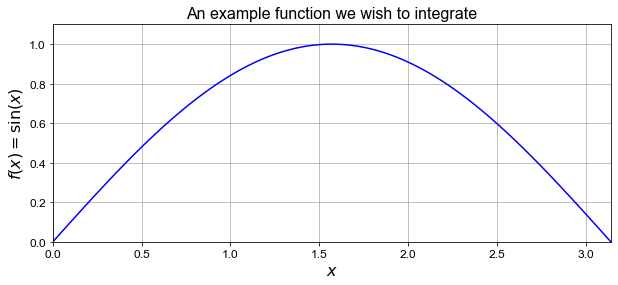

In [33]:
# set up figure
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot(111)

# Get the value of pi from numpy and generate 100 equally spaced values from 0 to pi.
x = np.linspace(0, np.pi, 100)

# Calculate sin at these points.
y = np.sin(x)

# plot
ax1.plot(x, y, 'b')

# Set x axis limits between 0 and pi.
ax1.set_xlim([0, np.pi])
ax1.set_ylim([0, 1.1])

# Label axis.
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$f(x)=\sin(x)$', fontsize=16)
ax1.set_title('An example function we wish to integrate', fontsize=16)

# Overlay a grid.
ax1.grid(True);

Now let's investigate some simple quadrature rules, finding the area under the curve and seeing how it differs from the true area which we know to be 2.

## The Midpoint rule

The *midpoint rule* is perhaps the simplest quadrature rule. 

For reasons that should be obvious from the next figure it is sometimes also called the *rectangle method*.

Consider one of the subintervals $\,[x_i, x_{i+1}].$

The midpoint rule approximates the integral over this (the $i$-th) subinterval by the area of a *rectangle*, with a base of length $\,(x_{i+1}-x_i)\,$ and a height given by the value of $\,f(x)\,$ at the midpoint of that interval (i.e. at $\,x=(x_{i+1}+x_i)/2$):

$$ I_M^{(i)} := (x_{i+1}-x_i) \;\; \times \;\; f \left ( \frac {x_{i+1}+x_i} {2} \right ), \;\;\;\;\;\;\text{for}
\;\;\;\;\;\; 0\le i \le n-1.$$

The midpoint estimate of $I$ then simply involves summing up over all the subintervals:

$$I_M := \sum_{i=0}^{n-1} \, f \left ( \frac {x_{i+1}+x_i} {2} \right )\, (x_{i+1}-x_i).$$

<br>

Let's write some code to plot the idea as well as compute an estimate of the integral using the midpoint rule.

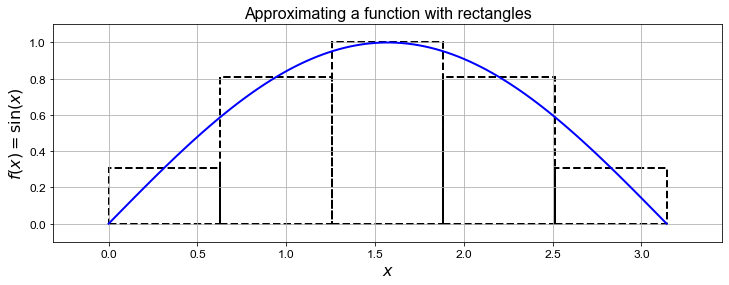

The sum of the areas of the rectangles is (I_M): 2.033281476926


In [34]:
# this is a matplotlib function that allows us to easily plot rectangles
# which will be useful for visualising what the midpoint rule does
from matplotlib.patches import Rectangle


def f(x):
    """The function we wish to integrate"""
    return np.sin(x)


# Get the value of pi from numpy and generate equally spaced values from 0 to pi.
x = np.linspace(0, np.pi, 100)
y = f(x)

# plot
fig = plt.figure(figsize=(12, 4))
ax1 = plt.subplot(111)
ax1.plot(x, y, 'b', lw=2)

ax1.margins(0.1)

# Label axis.
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$f(x)=\sin(x)$', fontsize=16)
ax1.set_title('Approximating a function with rectangles', fontsize=16)

# Overlay a grid.
ax1.grid(True)

number_intervals = 5
xi = np.linspace(0, np.pi, number_intervals+1)
I_M = 0.0
for i in range(number_intervals):
    ax1.add_patch(Rectangle((xi[i], 0.0), (xi[i+1] - xi[i]),
                            f((xi[i+1]+xi[i])/2), fill=False, ls='--', color='k', lw=2))
    I_M += f((xi[i+1]+xi[i])/2)*(xi[i+1] - xi[i])

# use an explicit show here to force the figure to appear before the following print.
plt.show()
print('The sum of the areas of the rectangles is (I_M): {:.12f}'.format(I_M))

### Implementing a midpoint rule function

Clearly the sum of the areas of all the rectangles provides an estimate of the true integral. In this particular case we observe an error of around 1.5% from the true value of 2.

[Note that the SciPy module features many different integration functions, and you can find thorough documentation for these functions (including methods not covered in this course) [here](http://docs.scipy.org/doc/scipy/reference/integrate.html). This library does not, however, contain a function for the midpoint rule, but it is trivial to create our own.]

As we are going to compare different rules below, let's implement a midpoint rule function.

In [35]:
def midpoint_rule(a, b, function, number_intervals=10):
    """ Our implementation of the midpoint quadrature rule.
    
    a and b are the end points for our interval of interest.
    
    'function' is the function of x \in [a,b] which we can evaluate as needed.
    
    number_intervals is the number of subintervals/bins we split [a,b] into.
    
    Returns the integral of function(x) over [a,b].
    """
    interval_size = (b - a)/number_intervals

    # Some examples of some asserts which might be useful here - 
    # you should get into the habit of using these sorts of checks as much as is possible/sensible.
    assert interval_size > 0
    assert type(number_intervals) == int
    
    # Initialise to zero the variable that will contain the cumulative sum of all the areas
    I_M = 0.0
    
    # Find the first midpoint -- i.e. the centre point of the base of the first rectangle
    mid = a + (interval_size/2.0)
    # and loop until we get past b, creating and summing the area of each rectangle
    while (mid < b):
        # Find the area of the current rectangle and add it to the running total
        # this involves an evaluation of the function at the subinterval midpoint
        I_M += interval_size * function(mid)
        # Move the midpoint up to the next centre of the interval
        mid += interval_size

    # Return our running total result
    return I_M

# check the function runs and agrees with our first version used to generate the schematic plot of the method above:
print('midpoint_rule(0, np.pi, np.sin, number_intervals=5) = ', midpoint_rule(0, np.pi, np.sin, number_intervals=5))

midpoint_rule(0, np.pi, np.sin, number_intervals=5) =  2.033281476926104


### Errors and convergence

Now that we have a function which performs the midpoint rule, let's test it (perform code verificaton) by confirming that the error decreases as we increase the number of subintervals, and see how rapidly this decrease occurs (faster would clearly be better).

We will print the errors as we compute them, but also store them so we can plot the variation of the error with the number of subintervals.

The exact area found by direct integration = 2
Area 1    rectangle(s) = 3.141592654 (error = 1.141592654e+00)
Area 2    rectangle(s) = 2.221441469 (error = 2.214414691e-01)
Area 4    rectangle(s) = 2.052344306 (error = 5.234430595e-02)
Area 8    rectangle(s) = 2.012909086 (error = 1.290908560e-02)
Area 16   rectangle(s) = 2.003216378 (error = 3.216378168e-03)
Area 32   rectangle(s) = 2.000803416 (error = 8.034163099e-04)
Area 100  rectangle(s) = 2.000082249 (error = 8.224907099e-05)
Area 1000 rectangle(s) = 2.000000822 (error = 8.224672938e-07)


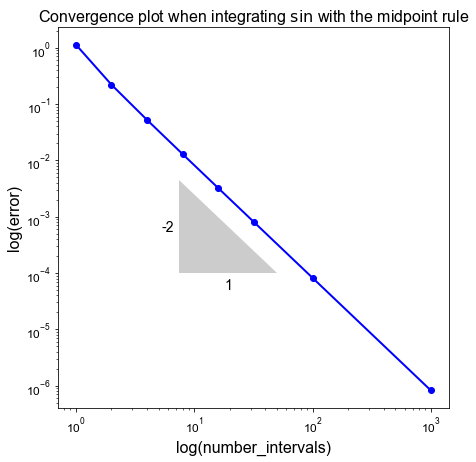

In [36]:
def f(x):
    """The function we wish to integrate"""
    return np.sin(x)


# Now let's test the midpoint function.
print('The exact area found by direct integration = 2')

# create a list of interval sizes to test 
interval_sizes_M = [1, 2, 4, 8, 16, 32, 100, 1000]

# initialise an array to store the errors
errors_M = np.zeros_like(interval_sizes_M, dtype='float64')

# loop over the list of interval sizes, compute and store errors
for (i, number_intervals) in enumerate(interval_sizes_M):
    area = midpoint_rule(0, np.pi, f, number_intervals)
    errors_M[i] = abs(area-2)
    print('Area {:<4d} rectangle(s) = {:.9f} (error = {:.9e})'.format(
        number_intervals, area, errors_M[i]))

# plot how the errors vary with interval size
fig = plt.figure(figsize=(7, 7))
ax1 = plt.subplot(111)
ax1.loglog(interval_sizes_M, errors_M, 'bo-', lw=2)
ax1.set_xlabel('log(number_intervals)', fontsize=16)
ax1.set_ylabel('log(error)', fontsize=16)
ax1.set_title('Convergence plot when integrating $\sin$ with the midpoint rule', fontsize=16)

# add a triangle to indicate the line slope
annotation.slope_marker((5e1, 1e-4), (-2, 1), invert=True, ax=ax1, 
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14));

### Observations


- With one rectangle, we are simply finding the area of a box of shape $\pi\, \times$ 1 ($\pi$ is the width of the rectangle and $1$ is the value of the function evaluated at the midpoint, $\pi/2$), so of course the result is $\pi$. 


- As we increase the number of subintervals, or rectangles, we increase the accuracy of our area.


- We can observe from the slope of the log-log plot of error against number of subintervals that the error is a quadratic function of the inverse of the number of subintervals (or equivalently is quadratically dependent on the spacing between the points - the interval size). 


- This demonstrates that (for this particular example at least), the method demonstrates second-order accuracy - if we halve the interval size the error goes down by a factor of 4!


- The simplicity of this method is its weakness, as rectangles (i.e. a flat top) are rarely a good approximation for the shape of a smooth function. 


- We want to use as few shapes as possible to approximate our function, because each additional rectangle is one extra time round the loop, which includes its own operations as well as an extra evaluation of the function, and hence increases the overall computational cost. 


- Instead, let's consider another shape that follows the profile a little better ...


## Trapezoidal rule

If we change the shape of the rectangle to a trapezoid (i.e. the top of the shape now being a linear line fit defined by the values of the function at the two end points of the subinterval, rather than the constant value used in the midpoint rule), we arrive at the trapezoid, or trapezoidal, rule. 

The trapezoid rule approximates the integral by the area of a trapezoid with base $(x_{i+1}-x_i)$ and the left- and right-hand-sides equal to the values of the function at the two end points.  

In this case the area of the shape approximating the integral over one subinterval, is given by:

$$I_T^{(i)} := (x_{i+1}-x_i) \;\; \times \;\; 
\left( \frac {f\left ( x_{i+1}\right ) + f \left (x_{i} \right )} {2} \right)
\;\;\;\;\;\;\text{for}
\;\;\;\;\;\; 0\le i \le n-1.$$

The trapezoidal estimate of $I$ then simply involves summing up over all the subintervals:

$$I_T := \sum_{i=0}^{n-1}\,   \left(\frac{f(x_{i+1}) + f(x_{i})}{2}\right )\, (x_{i+1}-x_i). $$

Let's write some code to plot the idea and compute an estimate of the integral.


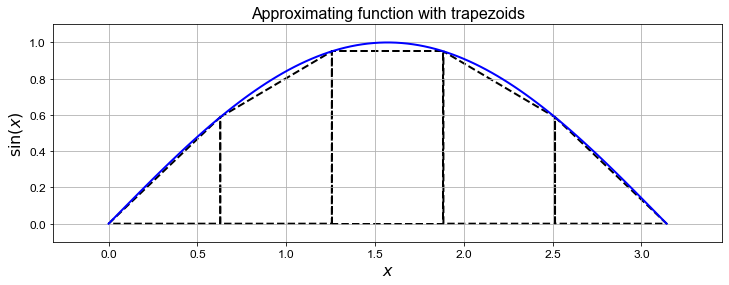

The sum of the areas of the trapezoids is (I_T): 1.933765598093


In [37]:
# this is a matplotlib function that allows us to plot polygons
from matplotlib.patches import Polygon


def f(x):
    """The function we wish to integrate"""
    return np.sin(x)


# Get the value of pi from numpy and generate equally spaced values from 0 to pi.
x = np.linspace(0, np.pi, 100)
y = f(x)

# plot
fig = plt.figure(figsize=(12, 4))
ax1 = plt.subplot(111)
ax1.plot(x, y, 'b', lw=2)

ax1.margins(0.1)

# Label axis.
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$\sin(x)$', fontsize=16)
ax1.set_title('Approximating function with trapezoids', fontsize=16)

# Overlay a grid.
ax1.grid(True)

number_intervals = 5
xi = np.linspace(0, np.pi, number_intervals+1)
I_T = 0.0
for i in range(number_intervals):
    ax1.add_patch(Polygon(np.array([[xi[i], 0], [xi[i], f(xi[i])], [
                  xi[i+1], f(xi[i+1])], [xi[i+1], 0]]), closed=True, fill=False, ls='--', color='k', lw=2))
    I_T += ((f(xi[i+1]) + f(xi[i]))/2)*(xi[i+1] - xi[i])

plt.show()
print('The sum of the areas of the trapezoids is (I_T): {:.12f}'.format(I_T))

### Observations

Based on the image alone it looks as though this *should* provide a far more accurate result than the midpoint rule.

In addition, the tops of the shapes (now trapezoids) are approximating the variation of the function over each subinterval with a linear function, rather than a flat (constant) function we saw with the midpoint rule, and so it would seem to again follow that this *should* provide a more accurate estimate of the integral.

However, the error with 5 subintervals we saw above for the midpoint rule is clearly lower than we are now seeing for trapezoidal! (Our approximately 1.5% error magnitude with midpoint is now more like 3%).

Note that SciPy does contain a function for the trapezoid rule, <a href="https://docs.scipy.org/doc/scipy-0.10.1/reference/generated/scipy.integrate.trapz.html">`scipy.integrate.trapz`</a>,
or  <a href="https://docs.scipy.org/doc/scipy-0.10.1/reference/generated/scipy.integrate.trapezoid.html">`scipy.integrate.trapezoid`</a> 
depending on what version you're using.


In the homework we implement our own version that works in a similar way to our midpoint rule function.



### The composite version of the trapezoidal rule

Of course if we think about what we're doing here we recognise that we can save some computational time (specifically function evaluations, which could each be very expensive so in some situations this may be especially worthwhile.).

Above we wrote down the mathematical expression for the scheme:

$$I_T := \sum_{i=0}^{n-1}\,   \left(\frac{f(x_{i+1}) + f(x_{i})}{2}\right )\, (x_{i+1}-x_i),$$

(and this is *exactly* what we implemented in our code).

But notice that under the assumption that the $x$ spacing of the data is uniform (say, $\Delta x$) this is exactly equivalent to

$$I_T := [f(x_0) + 2f(x_1) + 2f(x_2) + \ldots + 2f(x_{n-1}) + f(x_n)]\frac{\Delta x}{2},$$

which emphasises that we can implement a version of the rule which keeps the number of function evaluations to a minimum, i.e. which reduces the cost of the naive implementation.  

Note that this idea (minimising function evaluations) can of course also be generalised to the case where the $x$ points are not equally spaced, we just can't write the final expression in such a simple form (specifically we can't pull out the factor $\Delta x$ and have just "1" and "2" multipliers of the function values).

The method implemented in this manner would be termed the *composite trapezoidal rule*.  

See homework exercise.


### Terminology - composite quadrature rules 

A clarification on terminology:

Note that when we move onto some higher-order quadrature rules we can actually start getting reasonably accurate results using just a single (sub) interval. 

In this case we use the language ''XXXX rule'' for that rule applied to a *single* interval, and the ''*composite* XXXX rule'' to indicate that we have split up the total integration interval into a number of subintervals. Clearly the actual implementation of a composite rule will then in general look to follow an approach that minimises the number of function evaluations.

<div class="optional">

## Quadrature Accuracy and Errors [$\star$]

Another observation here is that in this particular case of half a sine wave, the trapezoid rule always *under-estimates* the area, whereas the midpoint rule *over-estimates*. 

We noted that, perhaps surprisingly, the midpoint rule is more accurate than the trapezoid rule - the reason for this is not immediately obvious from the discussions and the images above.

<br>

Note that the accuracy of a quadrature rule is predicted by examining its behaviour in practice with *polynomials*. 

We say that the **degree of accuracy** or the **degree of precision** of a quadrature rule is equal to $M$ if it is exact for all polynomials of degree up to and including $M$, but not exact for some polynomial of degree $M+1$.

<br>
<br>

Clearly both the midpoint and trapezoid rules will give the exact result for both constant and linear functions,

but they are not exact for quadratics 

[you could test our codes yourself on the function $x^2$ to demonstrate this].

Therefore, they both have a degree of precision of 1.


</div>

<div class="optional">

## Error analysis (qualitative)  [$\star$]

For the "concave-down" (i.e. the first half of a sine wave) function we chose above, notice from the plot that the trapezoidal rule will **consistently underestimate** the area under the curve, as the line segments approximating the function are always under the concave function curve.

In contrast, the mid-point rule will have parts of each rectangle above and below the curve, hence to a certain extent the **errors will cancel** each other out. 

This is why, *for this particular example*, the errors in the mid-point rule turn out to be approximately half those in the trapezoidal rule.  

While this result turns out to be *generally* true for smooth functions, we can always come up with (counter) examples where the trapezoid rule will win (can you think of an example?).

Taylor series analysis can be used to formally construct upper bounds on the quadrature error for both methods. 

We know that the error when integrating constant and linear functions is zero for our two rules, so let's first consider an example of integrating a quadratic polynomial.

We know analytically that

$$\int_{0}^{1} x^{2}\,dx = \left.\frac{1}{3}x^3\right|_0^1=\frac {1}{3}.$$

Whereas numerically the midpoint rule on a single interval gives an approximation of

\begin{equation}
I_M = 1 \left(\frac {1}{2}\right)^{2} = \frac {1}{4},
\end{equation}

while the trapezoidal rule gives

\begin{equation}
I_T = 1 \frac {0+1^{2}}{2} = \frac {1}{2}.
\end{equation}

The error for $I_M$ is therefore $1/3 - 1/4 = 1/12$, while the error for $I_T$ is $1/3 - 1/2 = -1/6$.

Therefore, the midpoint rule is twice as accurate as the trapezoid rule:

$$|E_M| = \frac{1}{2} |E_T|,$$

where $|E|$ indicates the error (the absolute value of the difference from the exact solution).

This is the case for this simple example, and we can see from the actual error values we calculate that it also appears to be approximately true for the sine (which note is not a simple polynomial) case as well. We'll skip going into the theory that establishes this fact more rigorously.

We will make use of this knowledge to generate new more accurate quadrature rules.

</div>

<div class="optional">

## Simpson's rule derivation  [$\star$]

Knowing the error estimates from the two rules explored so far opens up the potential for us to combine them in an appropriate manner to create a new quadrature rule, generally more accurate than either one separately. 

Suppose $I_S$ indicates an unknown, but more accurate, estimate of the integral over an interval.  

Then, as seen above, as $I_T$ has an error that is approximately $-2$ times the error in $I_M$, the following relation must hold approximately:


$$I_S - I_T \approx -2 \left ( I_S - I_M\right ).$$


This follows from the fact that $\,I - I_T \approx -2 \left ( I - I_M\right )$, provided that $I_S$ is closer to $I$ than either of the other two estimates.

</div>

<div class="optional">

Replacing this approximately equals sign with actual equality defines $I_S$ for us in terms of things we know. 

We can rearrange this to give an expression for $I_S$ that yields a more accurate estimate of the integral than either $I_M$ or $I_T$:

$$I_S := \frac{2}{3}I_M + \frac{1}{3}I_T.$$

What we're doing here is using the fact that we know something about (the *leading order* behaviour of the) two errors, and we can therefore combine them to cancel this error to a certain extent.

This estimate will generally be more accurate than either $M$ or $T$ alone. The error won't actually be zero in general as we're only cancelling out the leading order term in the error, but a consequence is that we will be left with higher-degree terms in the error expansion of the new quadrature rule which should be smaller (at least in the asymptotic limit), and converge faster. 

The resulting quadrature method in this case is known as [Simpson's rule](http://en.wikipedia.org/wiki/Simpson%27s_rule):

\begin{align*}
I_S &:= \frac{2}{3}I_M + \frac{1}{3}I_T \\[5pt]
&= \frac{2}{3}  (b-a)f\left ( \frac{a+b}{2}\right ) + \frac{1}{3}(b-a)\frac{(f(a) + f(b))}{2} \\[5pt]
& = \frac{(b-a)}{6}\left( f \left ( a\right ) + 4f \left ( c\right ) + f\left ( b\right )\right),
\end{align*}

where $a$ and $b$ are the end points of an interval and $c = \left ( a+b\right )/2$ is the midpoint.


Note that an alternate derivation of the same rule involves fitting a *quadratic function* (i.e. $P_2(x)$ rather than the constant and linear approximations already considered) that interpolates the integral at the two end points of the interval, $a$ and $b$, as well as at the midpoint, $c = \left ( a+b\right )/2$, and calculating the integral under that polynomial approximation.

See the homework exercise.

Let's plot what this method is doing and compute the integral for our sine case.

</div>

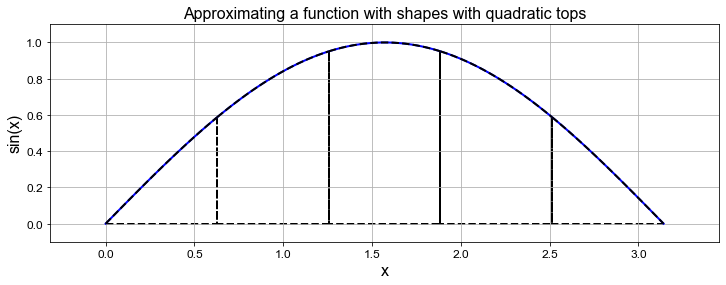

The Simpson's rule approximation (I_S): 2.000109517315


In [39]:
# this is a matplotlib function that allows us to plot polygons
# use this to plot the straight sides, and add an approximate
# quadratic at the top.
from matplotlib.patches import Polygon

def f(x):
    """The function we wish to integrate"""
    return np.sin(x)

# Get the value of pi from numpy and generate equally spaced values from 0 to pi.
x = np.linspace(0, np.pi, 100)
y = f(x)

# plot
fig = plt.figure(figsize=(12, 4))
ax1 = plt.subplot(111)
ax1.plot(x, y, 'b', lw=2)

ax1.margins(0.1)

# Label axis.
ax1.set_xlabel('x', fontsize=16)
ax1.set_ylabel('sin(x)', fontsize=16)
ax1.set_title('Approximating a function with shapes with quadratic tops', fontsize=16)

# Overlay a grid.
ax1.grid(True)

number_intervals = 5
xi = np.linspace(0, np.pi, number_intervals+1)

I_S = 0.0

for i in range(number_intervals):
    # use a non-closed Polygon to visualise the straight sides of each interval 
    ax1.add_patch(Polygon(np.array([[xi[i], f(xi[i])], [xi[i], 0], [xi[i+1], 0], [xi[i+1], f(xi[i+1])]]),
                          closed=False, fill=False, ls='--', color='k', lw=2))
    # add the quadratic top - fit a quadratic using numpy
    poly_coeff = np.polyfit((xi[i], (xi[i] + xi[i+1])/2.0, xi[i + 1]),
                            (f(xi[i]), f((xi[i] + xi[i+1])/2.0), f(xi[i+1])), 2)
    # plot the quadratic using 20 plotting points within the interval 
    ax1.plot(np.linspace(xi[i], xi[i+1], 20),
             f(np.linspace(xi[i], xi[i+1], 20)), ls='--', color='k', lw=2)
    # add in the area of the interval shape to our running total using Simpson's formula
    I_S += ((xi[i+1] - xi[i])/6.) * (f(xi[i]) + 4 *
                                     f((xi[i] + xi[i+1])/2.0) + f(xi[i+1]))

plt.show()
print("The Simpson's rule approximation (I_S): {:.12f}".format(I_S))

## Simpson's rule Implementation

[Simpson's rule](http://en.wikipedia.org/wiki/Simpson%27s_rule) is given by

\begin{align*}
I_S = \frac{(b-a)}{6}\left( f \left ( a\right ) + 4f \left ( c\right ) + f\left ( b\right )\right),
\end{align*}

where $a$ and $b$ are the end points of an interval and $c = \left ( a+b\right )/2$ is the midpoint.

As stated above, an alternate derivation or interpretation of the same rule involves fitting a *quadratic function* (i.e. $P_2(x)$ rather than the constant and linear approximations already considered) that interpolates the integral at the two end points of the interval, $a$ and $b$, as well as at the midpoint, $c = \left ( a+b\right )/2$, and calculating the integral under that polynomial approximation.

This is shown in the above image where the approximation of the quadratic over each subinterval is very good - visually it looks exact but of course it isn't as we can exactly approximate a trigonometric function with a polynomial.

This is confirmed by the very accurate approximation to the integral. 

But note that here we have had to additionally evaluate the function at the midpoints of the subintervals; we need to bear this in mind when comparing methods. With 5 subintervals the number of function evaluations we have used so far is: Midpoint - 5; Trapezoidal (the composite version) - 6; Simpson's - 11 (at least with this implementation of the method - see later).

Of course the agreement (visually and quantitatively) won't be quite so good for complicated, rapidly varying functions.

Let's now complete an implementation of Simpson's rule and test it on our sine function.

In [42]:
def simpsons_rule(a, b, function, number_intervals=10):
    """ Function to evaluate Simpson's rule. 
    
    Note that this implementation takes the function as an argument, 
    and evaluates this at the midpoint of subintervals in addition to the 
    end point. Hence additional information is generated and used through 
    additional function evaluations. 
    
    This is different to the function/implementation available with SciPy  
    where discrete data only is passed to the function. 
    
    Bear this in mind when comparing results - there will be a factor of two
    in the definition of "n" we need to be careful about!
    
    Also note that this version of the function performs redundant function 
    evaluations - see the **composite** implementation below.
    """

    interval_size = (b - a)/number_intervals

    assert interval_size > 0
    assert type(number_intervals) == int

    I_S = 0.0

    # Loop to valuate Simpson's formula over each interval 
    for i in range(number_intervals):
        # Find a, c, and b
        this_bin_start = a + interval_size * (i)
        this_bin_mid = this_bin_start + interval_size/2
        this_bin_end = this_bin_start + interval_size
        # Calculate the rule and add to running total.
        I_S += (interval_size/6) * (function(this_bin_start) +
                                  4 * function(this_bin_mid) + function(this_bin_end))

    # Return our running total result
    return I_S

The exact area found by direct integration = 2
Area 1    for Simpson = 2.0943951023931953 (error = 9.439510239e-02)
Area 2    for Simpson = 2.0045597549844207 (error = 4.559754984e-03)
Area 4    for Simpson = 2.0002691699483877 (error = 2.691699484e-04)
Area 8    for Simpson = 2.0000165910479355 (error = 1.659104794e-05)
Area 16   for Simpson = 2.0000010333694127 (error = 1.033369413e-06)
Area 32   for Simpson = 2.0000000645300018 (error = 6.453000179e-08)
Area 100  for Simpson = 2.0000000006764709 (error = 6.764708793e-10)
Area 1000 for Simpson = 2.0000000000000679 (error = 6.794564911e-14)

Verificaton check: These are the corresponding values computed using SciPy  (BUT read the comment in the code above!)
2.0943951023931953, 0.0000000000000000e+00
2.0045597549844207, 0.0000000000000000e+00
2.0002691699483877, 0.0000000000000000e+00
2.0000165910479355, 0.0000000000000000e+00
2.0000010333694132, 4.4408920985006262e-16
2.0000000645300018, 0.0000000000000000e+00
2.0000000006764718, 8.88

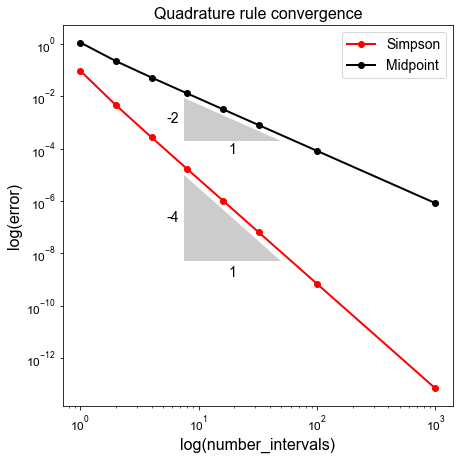

In [43]:
def f(x):
    """The function we wish to integrate"""
    return np.sin(x)

# Now let's test the Simpson's rule function.
print("The exact area found by direct integration = 2")
interval_sizes_S = [1, 2, 4, 8, 16, 32, 100, 1000]
errors_S = np.zeros_like(interval_sizes_S, dtype='float64')
areas_S = np.zeros_like(interval_sizes_S, dtype='float64')
for (i, number_intervals) in enumerate(interval_sizes_S):
    areas_S[i] = simpsons_rule(0, np.pi, f, number_intervals)
    errors_S[i] = abs(areas_S[i] - 2)
    print('Area {:<4d} for Simpson = {:.16f} (error = {:.9e})'.format(
        number_intervals, areas_S[i], errors_S[i]))
    
    
print('\nVerificaton check: These are the corresponding values computed using SciPy' 
      '  (BUT read the comment in the code above!)')
# note that since our function above takes the function and can evaluate it wherever it likes, 
# it essentially doubles the number of intervals by evaluating the function at the mid points.
# The scipy function takes in discrete data points, and hence fits a polynomial across two
# intervals. 
# Therefore to get the same values we need to explicitly double the number of intervals in the
# function call: 
# instead of passing it 'number_intervals' points, we pass it '2*number_intervals + 1' points
# Also the SciPy implementation obviously needs an even number of intervals (equivalently an ODD
# number of data points)
# Note we didn't have this issue with the SciPy version of trapezoidal as both the function and
# data point passing versions of the method only need two (end) points per interval.
for (i, number_intervals) in enumerate(interval_sizes_S):
    area_scipy_simpson = scipy.integrate.simps(f(np.linspace(0, np.pi, 2*number_intervals + 1)),
                   np.linspace(0, np.pi, 2*number_intervals + 1))
    print('{0:.16f}, {1:.16e}'.format(area_scipy_simpson, abs(area_scipy_simpson - areas_S[i])))
    

# plot
fig = plt.figure(figsize=(7, 7))
ax1 = plt.subplot(111)
ax1.loglog(interval_sizes_S, errors_S, 'ro-', lw=2, label='Simpson')
#ax1.loglog(interval_sizes_T, errors_T, 'bo-', lw=2, label='Trapezoidal')
ax1.loglog(interval_sizes_M, errors_M, 'ko-', lw=2, label='Midpoint')
ax1.set_xlabel('log(number_intervals)', fontsize=16)
ax1.set_ylabel('log(error)', fontsize=16)
ax1.set_title('Quadrature rule convergence', fontsize=16)
ax1.legend(loc='best', fontsize=14)

annotation.slope_marker((5e1, 2e-4), (-2, 1), invert=True, ax=ax1, 
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))
annotation.slope_marker((5e1, 5e-9), (-4, 1), invert=True, ax=ax1, 
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14));

   
### Observations


- The errors are lower than for the midpoint (and trapezoidal - which from a homework question can be seen to be double that of midpoint, converging at same rate) rules, and the method converge more rapidly - i.e. the relative improvement only gets better for more subintervals.


- This expression now integrates up to cubics exactly (by construction), so it has order of precision 3 (with convergence order 4 as confirmed by the convergence plot above).


- We're getting down to errors close to machine precision now when we use 1000 subintervals. But remember we may well either have a relatively small number of data points, or want to minimise the number of function evaluations well below this relatively high number. This will mean that for problems with lots of variation, and/or in higher dimensions, that we still work to do in improving our quadrature methods.


- As was the case with our first Trapezoidal implementation, we are performing unnecessary function evaluations here; we can again fix this issue through the implementation of a *composite* version of the rule.


# Summary


- Interpolation (going through all data points) vs regression/curve-fitting (not attempting to fit all data - think cloud of points).


- Minimal degree interpolating polynomial unique, hence different construction methods arrive at the same polynomial - but choice of basis impacts on the cost and implementation of obtaining the polynomial.


- Problems with high-degree polynomial interpolation when using uniform data points.


- Many sophisticated interpolation approaches available with different properties, optimal choice depends on your application and requirements.


- Extrapolaton - try not to do it if at all possible.


- Curve-fitting/regression - Least squares (note we saw in an earlier lecture an example that used minimisation of other norms to fit a line to data, more on this in the module Inversion & Optimisation in the context of inversion for over-determined problems).


- Simple 1D qudrature rules (up to and including Simpson's rule) - derivation, implementation and testing against SciPy.



<br>

- Many of these concepts carry over to other areas of numerical methods, optimisation & inversion, data science, machine learning, ...


<br>

<br>


Note that in higher dimensions similar ideas to those presented in this lecture in 1D can also be applied.
